# Importing dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#To print all columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
df = pd.read_excel("customer_retention.xlsx")
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

# Preprocessing and EDA:

In [6]:
df.shape

(269, 71)

In [7]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [8]:
#Checking the data types of all columns
df.dtypes

1Gender of respondent                                                                                                                                                                                                  object
2 How old are you?                                                                                                                                                                                                     object
3 Which city do you shop online from?                                                                                                                                                                                  object
4 What is the Pin Code of where you shop online from?                                                                                                                                                                   int64
5 Since How Long You are Shopping Online ?                                                                      

In [9]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [10]:
#Checking unique values of each column
df.nunique()

1Gender of respondent                                                                                                                                                                                                   2
2 How old are you?                                                                                                                                                                                                      5
3 Which city do you shop online from?                                                                                                                                                                                  11
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  39
5 Since How Long You are Shopping Online ?                                                                                      

In [11]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')


Female    181
Male       88
Name: 1Gender of respondent, dtype: int64
****************************************
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64
****************************************
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64
****************************************
201308    38
132001    19
201310    18
110044    16
250001     9
173229     9
173212     9
560010     8
132036     8
122018     8
560037     8
110008     7
110011     7
201306     7
110014     6
110018     6
201305     5
201008     5
201009     5
201312     5
244001     5
530068     5
122009     4
201001     4
560003     4
201304     4
110009     4
201303     4


# Grouping Duplicate entries:

In [12]:
#Grouping "6 How many times you have made an online purchase in the past 1 year?" column
df["6 How many times you have made an online purchase in the past 1 year?"].replace("42 times and above","41 times and above",inplace=True)

In [13]:
#Grouping "7 How do you access the internet while shopping on-line?" column
df["7 How do you access the internet while shopping on-line?"].replace("Mobile internet","Mobile Internet",inplace=True)

In [14]:
#Grouping "16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t" column
df["16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   "].replace("Very frequently","Frequently",inplace=True)

In [15]:
#Grouping "18 The content on the website must be easy to read and understand" column
df["18 The content on the website must be easy to read and understand"].replace("Strongly agree (5)","Agree (4)",inplace=True)

In [16]:
#Grouping "19 Information on similar product to the one highlighted  is important for product comparison" column
df["19 Information on similar product to the one highlighted  is important for product comparison"].replace("Strongly agree (5)","Agree (4)",inplace=True)

In [18]:
#Grouping "20 Complete information on listed seller and product being offered is important for purchase decision." column
df["20 Complete information on listed seller and product being offered is important for purchase decision."].replace("Strongly agree (5)","Agree (4)",inplace=True)

df["20 Complete information on listed seller and product being offered is important for purchase decision."].replace("Strongly disagree (1)","Dis-agree (2)",inplace=True)

In [19]:
#Grouping "21 All relevant information on listed products must be stated clearly" column
df["21 All relevant information on listed products must be stated clearly"].replace("Strongly agree (5)","Agree (4)",inplace=True)

df["21 All relevant information on listed products must be stated clearly"].replace("Strongly disagree (1)","Dis-agree (2)",inplace=True)

In [20]:

#Grouping "22 Ease of navigation in website" column
df["22 Ease of navigation in website"].replace("Strongly agree (5)","Agree (4)",inplace=True)

df["22 Ease of navigation in website"].replace("Strongly disagree (1)","Dis-agree (2)",inplace=True)

In [21]:
#Grouping "23 Loading and processing speed" column
df["23 Loading and processing speed"].replace("Strongly agree (5)","Agree (4)",inplace=True)

df["23 Loading and processing speed"].replace("Strongly disagree (1)","Dis-agree (2)",inplace=True)

In [22]:

#Grouping "24 User friendly Interface of the website" column
df["24 User friendly Interface of the website"].replace("Strongly agree (5)","Agree (4)",inplace=True)

df["24 User friendly Interface of the website"].replace("Strongly disagree (1)","Dis-agree (2)",inplace=True)

In [23]:
#Grouping "25 Convenient Payment methods" column
df["25 Convenient Payment methods"].replace("Strongly agree (5)","Agree (4)",inplace=True)

In [24]:
#Grouping "26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time" column
df["26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time"].replace("Strongly agree (5)","Agree (4)",inplace=True)

In [25]:
#Grouping "27 Empathy (readiness to assist with queries) towards the customers" column
df["27 Empathy (readiness to assist with queries) towards the customers"].replace("Strongly agree (5)","Agree (4)",inplace=True)

In [26]:
#Grouping "28 Being able to guarantee the privacy of the customer" column
df["28 Being able to guarantee the privacy of the customer"].replace("Strongly agree (5)","Agree (4)",inplace=True)

In [27]:
#Grouping "29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)" column
df["29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)"].replace("Strongly agree (5)","Agree (4)",inplace=True)

In [28]:
#Grouping "30 Online shopping gives monetary benefit and discounts" column
df["30 Online shopping gives monetary benefit and discounts"].replace("Strongly agree (5)","Agree (4)",inplace=True)

df["30 Online shopping gives monetary benefit and discounts"].replace("Strongly disagree (1)","Dis-agree (2)",inplace=True)

In [29]:
#Grouping "31 Enjoyment is derived from shopping online" column
df["31 Enjoyment is derived from shopping online"].replace("Strongly agree (5)","Agree (4)",inplace=True)

df["31 Enjoyment is derived from shopping online"].replace("Strongly disagree (1)","Dis-agree (2)",inplace=True)

In [30]:
#Grouping "32 Shopping online is convenient and flexible" column
df["32 Shopping online is convenient and flexible"].replace("Strongly agree (5)","Agree (4)",inplace=True)

In [31]:
#Grouping "33 Return and replacement policy of the e-tailer is important for purchase decision" column
df["33 Return and replacement policy of the e-tailer is important for purchase decision"].replace("Strongly agree (5)","Agree (4)",inplace=True)

In [32]:
#Grouping "34 Gaining access to loyalty programs is a benefit of shopping online" column
df["34 Gaining access to loyalty programs is a benefit of shopping online"].replace("Strongly agree (5)","Agree (4)",inplace=True)

df["34 Gaining access to loyalty programs is a benefit of shopping online"].replace("Strongly disagree (1)","Dis-agree (2)",inplace=True)

In [33]:
#Grouping "35 Displaying quality Information on the website improves satisfaction of customers" column
df["35 Displaying quality Information on the website improves satisfaction of customers"].replace("Strongly agree (5)","Agree (4)",inplace=True)

In [34]:
#Grouping "36 User derive satisfaction while shopping on a good quality website or application" column
df["36 User derive satisfaction while shopping on a good quality website or application"].replace("Strongly agree (5)","Agree (4)",inplace=True)

In [35]:
#Grouping "37 Net Benefit derived from shopping online can lead to users satisfaction" column
df["37 Net Benefit derived from shopping online can lead to users satisfaction"].replace("Strongly agree (5)","Agree (4)",inplace=True)

In [36]:
#Grouping "38 User satisfaction cannot exist without trust" column
df["38 User satisfaction cannot exist without trust"].replace("Strongly agree (5)","Agree (4)",inplace=True)

df["38 User satisfaction cannot exist without trust"].replace("Strongly disagree (1)","Dis-agree (2)",inplace=True)

In [37]:
#Grouping "39 Offering a wide variety of listed product in several category" column
df["39 Offering a wide variety of listed product in several category"].replace("Strongly agree (5)","Agree (4)",inplace=True)

In [38]:
#Grouping "40 Provision of complete and relevant product information" column
df["40 Provision of complete and relevant product information"].replace("Strongly agree (5)","Agree (4)",inplace=True)

In [39]:
#Grouping "41 Monetary savings" column
df["41 Monetary savings"].replace("Strongly agree (5)","Agree (4)",inplace=True)

In [40]:
#Grouping "42 The Convenience of patronizing the online retailer" column
df["42 The Convenience of patronizing the online retailer"].replace("Strongly agree (5)","Agree (4)",inplace=True)

In [41]:
#Grouping "43 Shopping on the website gives you the sense of adventure" column
df["43 Shopping on the website gives you the sense of adventure"].replace("Strongly agree (5)","Agree (4)",inplace=True)

df["43 Shopping on the website gives you the sense of adventure"].replace("Strongly disagree (1)","Dis-agree (2)",inplace=True)

In [42]:
#Grouping "44 Shopping on your preferred e-tailer enhances your social status" column
df["44 Shopping on your preferred e-tailer enhances your social status"].replace("Strongly agree (5)","Agree (4)",inplace=True)

df["44 Shopping on your preferred e-tailer enhances your social status"].replace("Strongly disagree (1)","Dis-agree (2)",inplace=True)

In [43]:
#Grouping "45 You feel gratification shopping on your favorite e-tailer" column
df["45 You feel gratification shopping on your favorite e-tailer"].replace("Strongly agree (5)","Agree (4)",inplace=True)

df["45 You feel gratification shopping on your favorite e-tailer"].replace("Strongly disagree (1)","Disagree (2)",inplace=True)

df["45 You feel gratification shopping on your favorite e-tailer"].replace("Dis-agree (2)","Disagree (2)",inplace=True)

In [44]:
#Grouping "46 Shopping on the website helps you fulfill certain roles" column
df["46 Shopping on the website helps you fulfill certain roles"].replace("Strongly agree (5)","Agree (4)",inplace=True)

df["46 Shopping on the website helps you fulfill certain roles"].replace("Strongly disagree (1)","Dis-agree (2)",inplace=True)

In [45]:
#Grouping "47 Getting value for money spent" column
df["47 Getting value for money spent"].replace("Strongly agree (5)","Agree (4)",inplace=True)

In [46]:
#Lets check the value count of each column again after grouping
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64
****************************************
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64
****************************************
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64
****************************************
201308    38
132001    19
201310    18
110044    16
250001     9
173229     9
173212     9
560010     8
132036     8
122018     8
560037     8
110008     7
110011     7
201306     7
110014     6
110018     6
201305     5
201008     5
201009     5
201312     5
244001     5
530068     5
122009     4
201001     4
560003     4
201304     4
110009     4
201303     4


In [47]:

#Converting data type of Pin code column
df['4 What is the Pin Code of where you shop online from?'] = df['4 What is the Pin Code of where you shop online from?'].astype("object")

In [48]:
#Checking for dtypes again
df.dtypes

1Gender of respondent                                                                                                                                                                                                  object
2 How old are you?                                                                                                                                                                                                     object
3 Which city do you shop online from?                                                                                                                                                                                  object
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  object
5 Since How Long You are Shopping Online ?                                                                      

In [49]:
#Checking null values in the dataset
df.isnull().sum()

1Gender of respondent                                                                                                                                                                                                  0
2 How old are you?                                                                                                                                                                                                     0
3 Which city do you shop online from?                                                                                                                                                                                  0
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  0
5 Since How Long You are Shopping Online ?                                                                                          

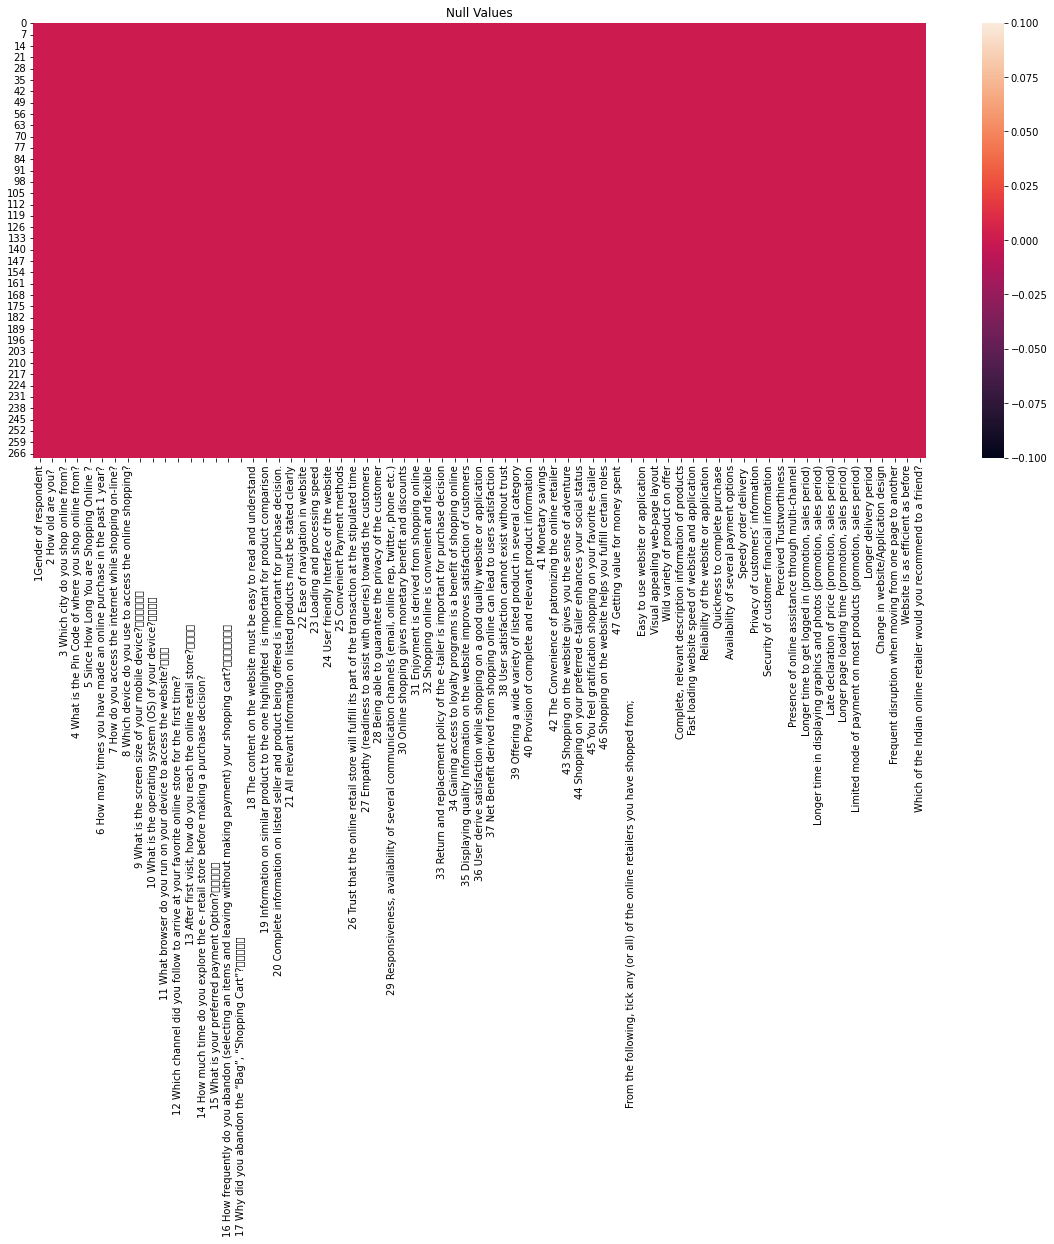

In [50]:
#Visualizeing null values
plt.figure(figsize=[20,8])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [51]:
#Describing the object datatypes columns
df.describe(include='object')

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

# VISUALIZATION

# Univariate Analysis:

In [52]:
# Separating numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

[]


It's looks very clear that i don't have any numerical columns in the dataset it means all is object.

In [97]:
#Renaming column names
rename_columns = ['Gender','Age','Shopping_City','PinCode','Shopping_Since','Shopping_Frequency','Internet_Access','Device_Used',
           'Screen_Size','Operating_System', 'Browser_Used','Channel_FirstUsed','Login_Mode','TimeSpent_ForPurchase','Payment_Mode','Abandon_Frequency',
          'Abandon_Reason','Content_Readability','Similar_ProductInfo','Seller_ProductInfo','ProductInfo_Clarity','Ease_Navigation',
          'Loading_ProcessingSpeed','UserFriendly_Interface','Conveninet_PaymentMode','TimelyFulfilment_Trust','Customer_Empathy',
          'CustPrivacy_Guarantee','VariousChannel_Responses','Benefit_Discount','Enjoy_OnlineShopping','Convenience_Flexibility','Returns_ReplacementPolicy','Loyalty_ProgramAccess',
          'QualityInfo_Satisfaction','WebsiteQuality_Satisfaction','NetBenefit_Satisfaction','User_Trust','Product_SeveralCategory','Relevant_ProductInfo','Monetary_Savings',
          'Patronizing_Convenience','Adventure_Sense','Enhances_SocialStatus','Gratification_Shopping','Role_Fulfilment','Money_Worthy','Shopped_From','Easy_WebApp',
           'Visually_AppealingWebApp','Product_Variety','Complete_ProductInfo','Fast_WebApp','Reliable_WebApp','Quick_Purchase','PaymentOptions_Availability',
           'Fast_Delivery','CustInfo_Privacy','FinancialInfo_Security','Perceived_Trustworthiness','MultiChannel_Assistance','Long_LoginTime','LongPhoto_DisplayTime',
           'LatePrice_Declare','Long_LoadingTime','Limited_PaymentMode','Late_Delivery','ChangeWebApp_Design','Page_Disruption','WebApp_Efficiency',
           'Recommendation']

df.columns = rename_columns

In [98]:
# Separating categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Gender', 'Age', 'Shopping_City', 'PinCode', 'Shopping_Since', 'Shopping_Frequency', 'Internet_Access', 'Device_Used', 'Screen_Size', 'Operating_System', 'Browser_Used', 'Channel_FirstUsed', 'Login_Mode', 'TimeSpent_ForPurchase', 'Payment_Mode', 'Abandon_Frequency', 'Abandon_Reason', 'Content_Readability', 'Similar_ProductInfo', 'Seller_ProductInfo', 'ProductInfo_Clarity', 'Ease_Navigation', 'Loading_ProcessingSpeed', 'UserFriendly_Interface', 'Conveninet_PaymentMode', 'TimelyFulfilment_Trust', 'Customer_Empathy', 'CustPrivacy_Guarantee', 'VariousChannel_Responses', 'Benefit_Discount', 'Enjoy_OnlineShopping', 'Convenience_Flexibility', 'Returns_ReplacementPolicy', 'Loyalty_ProgramAccess', 'QualityInfo_Satisfaction', 'WebsiteQuality_Satisfaction', 'NetBenefit_Satisfaction', 'User_Trust', 'Product_SeveralCategory', 'Relevant_ProductInfo', 'Monetary_Savings', 'Patronizing_Convenience', 'Adventure_Sense', 'Enhances_SocialStatus', 'Gratification_Shopping', 'Role_Fulfilment', 'Money_Worthy'

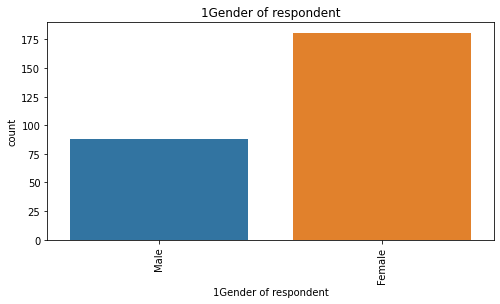

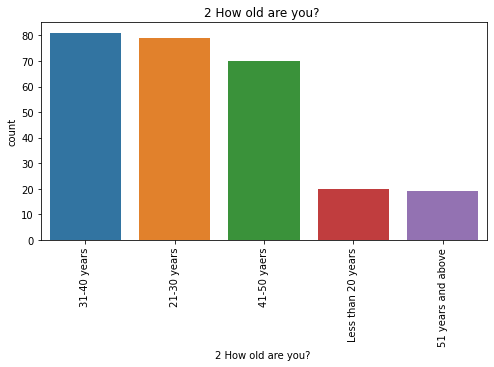

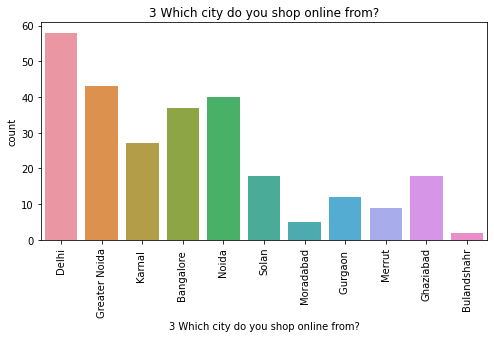

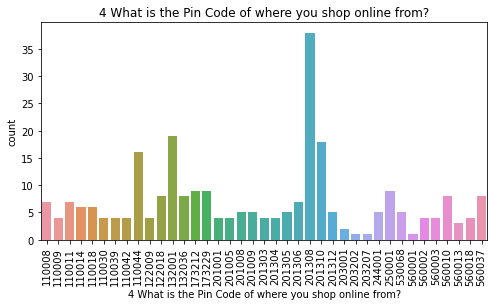

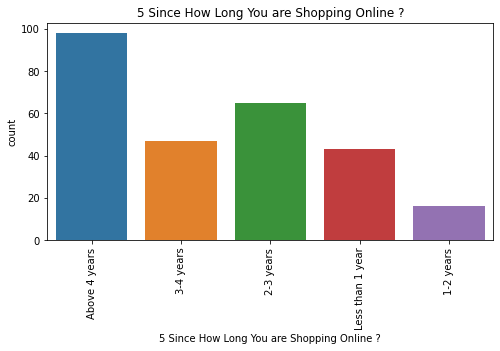

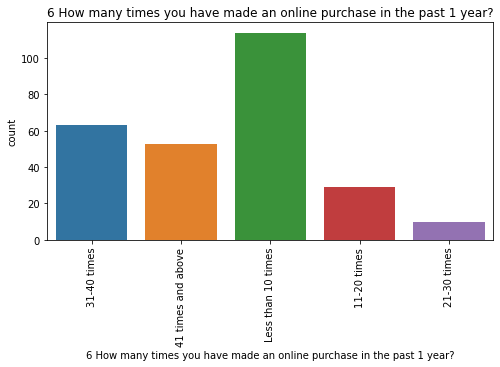

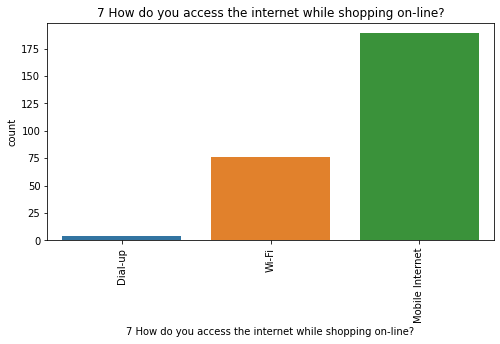

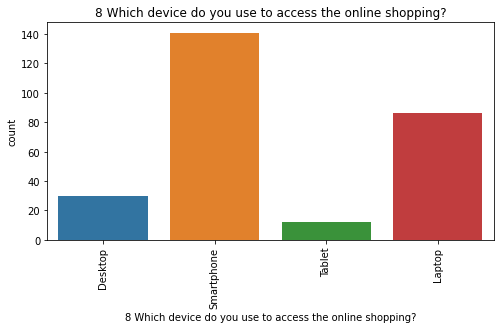

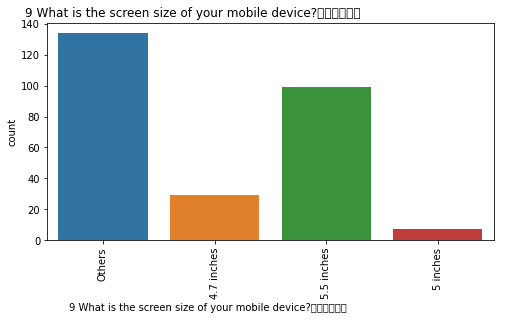

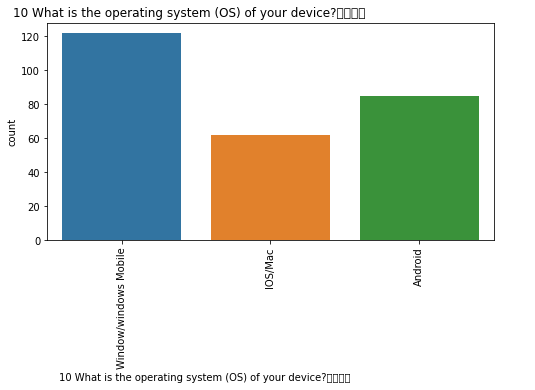

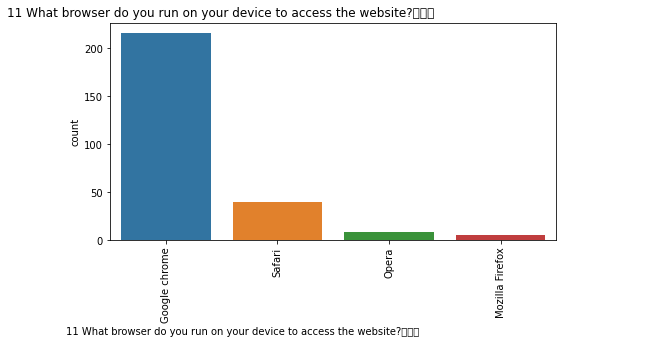

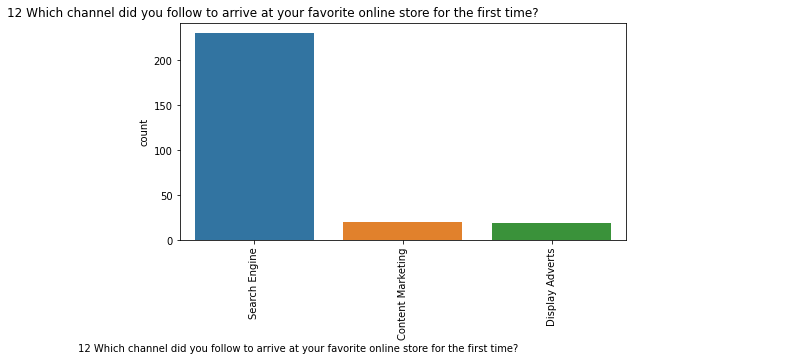

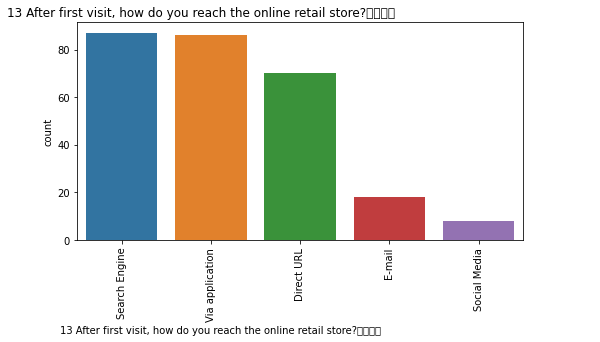

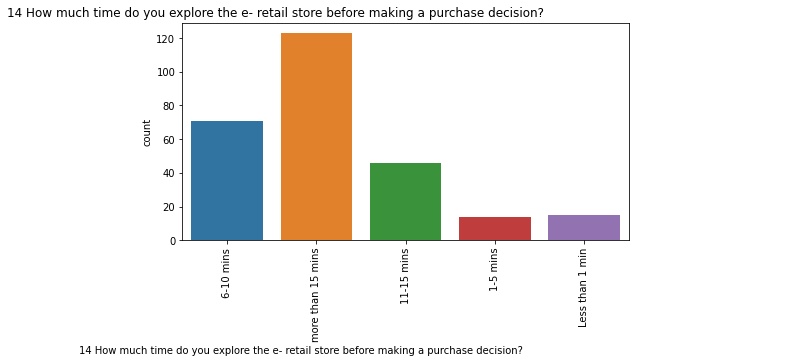

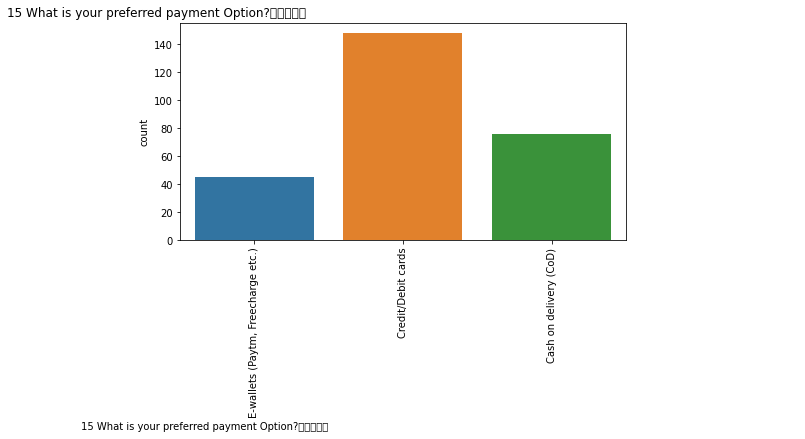

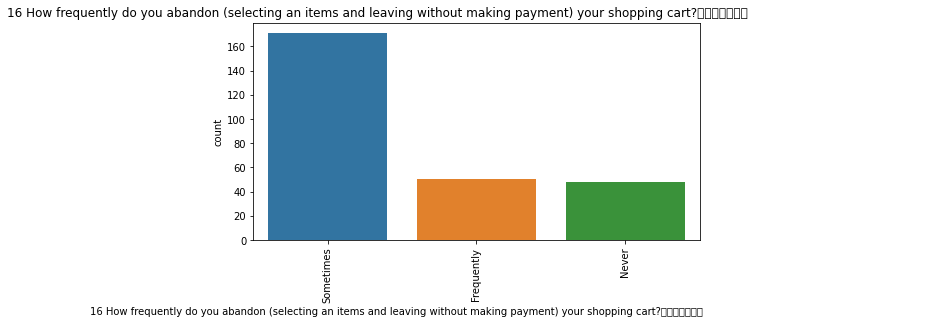

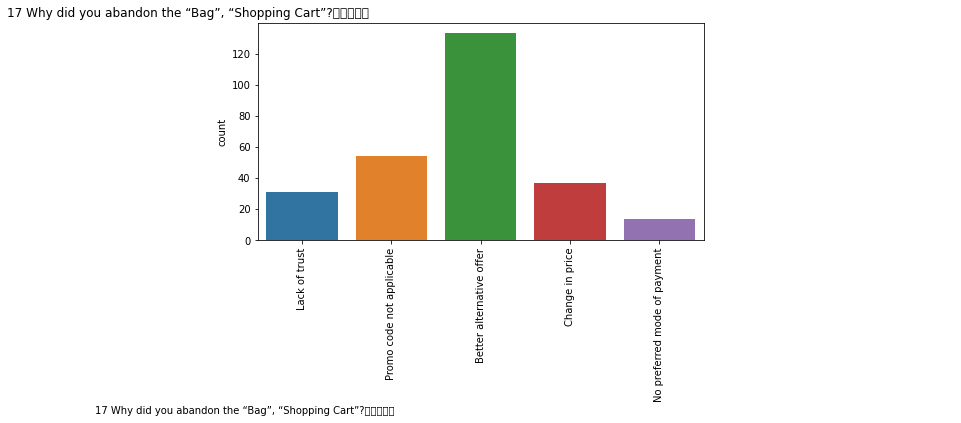

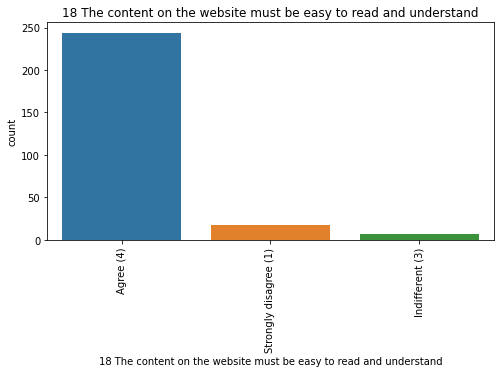

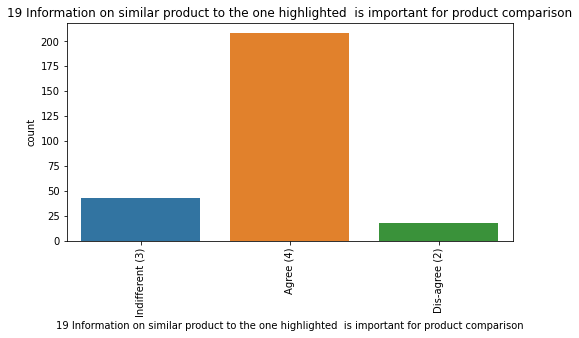

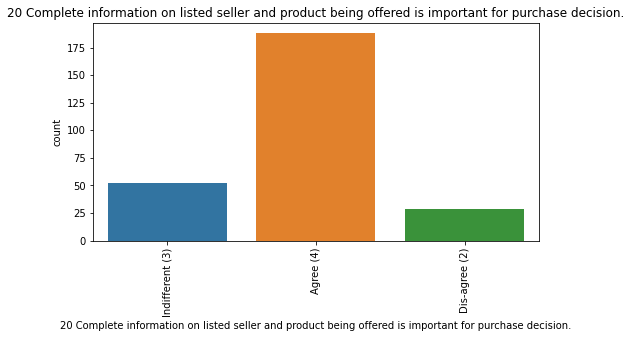

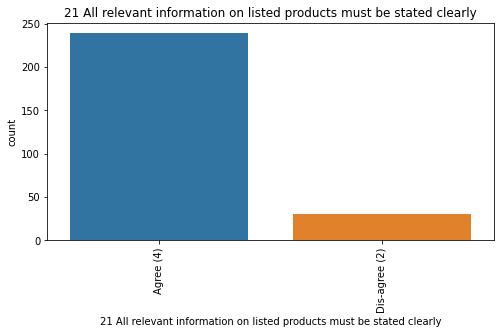

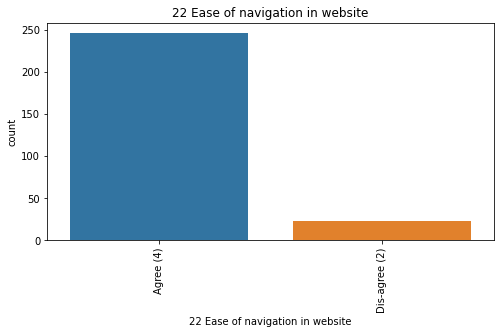

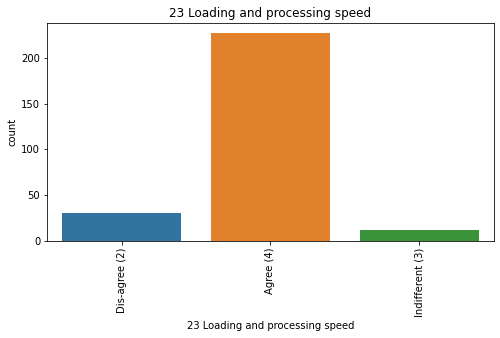

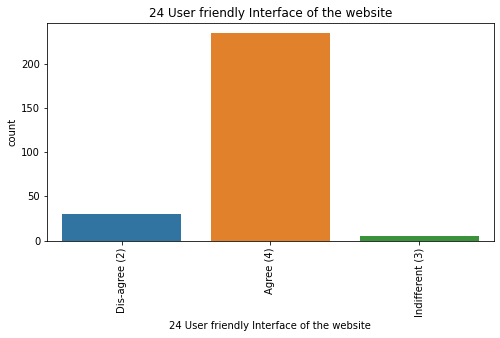

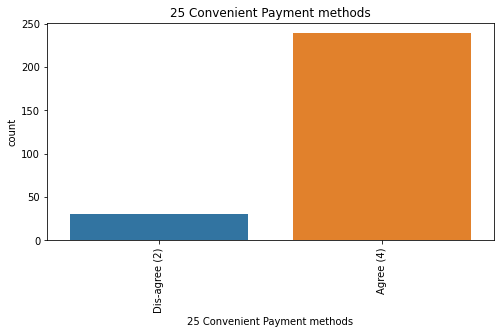

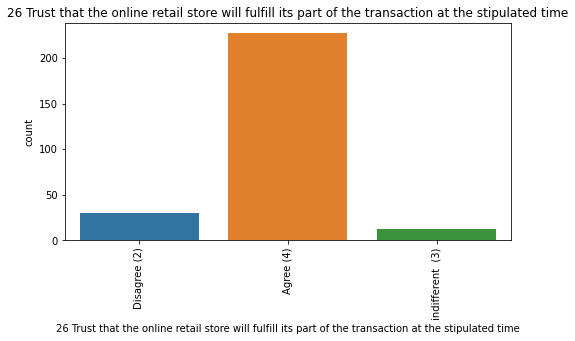

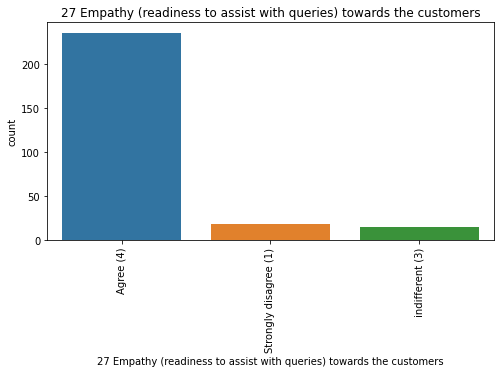

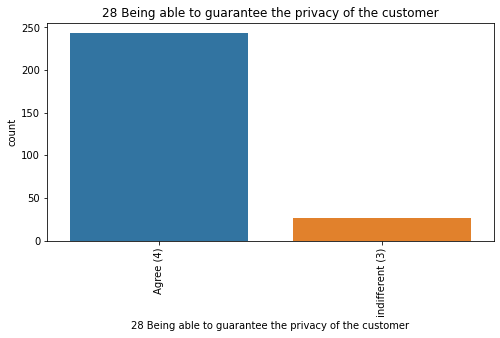

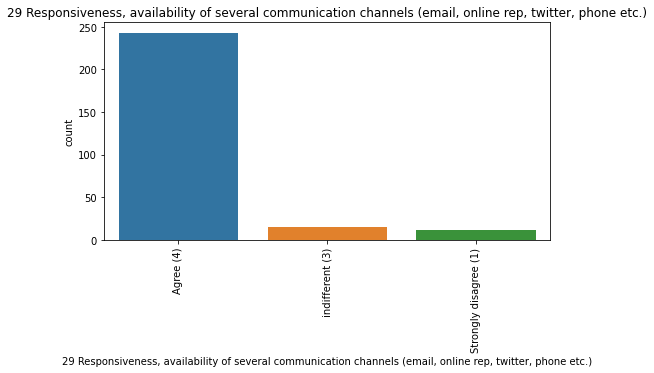

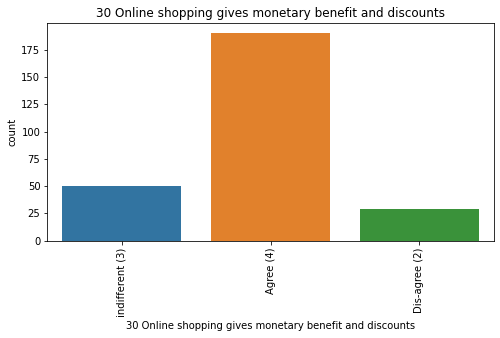

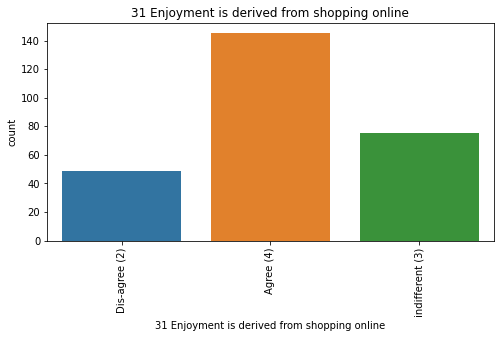

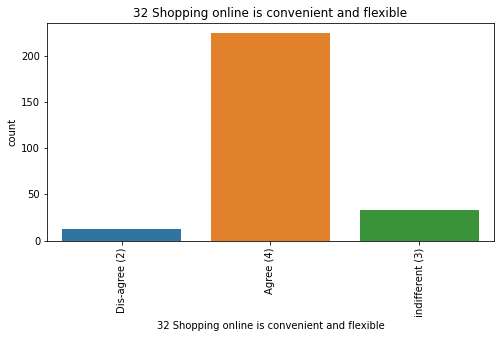

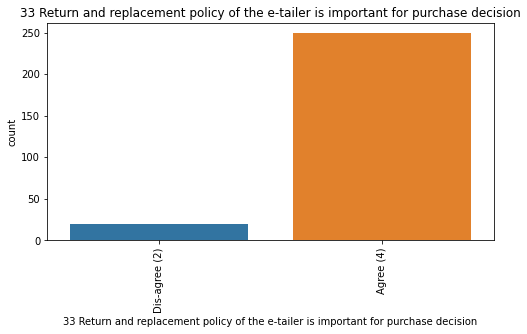

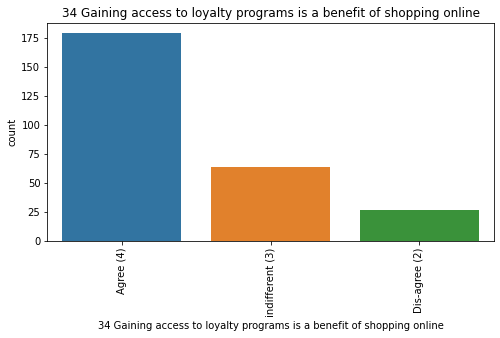

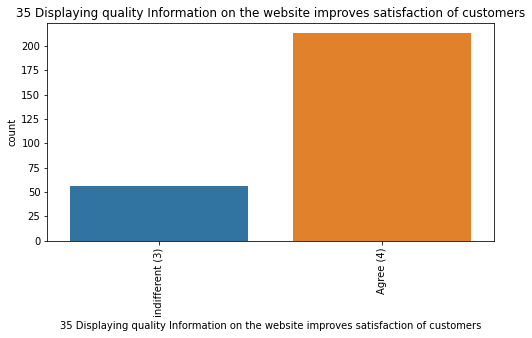

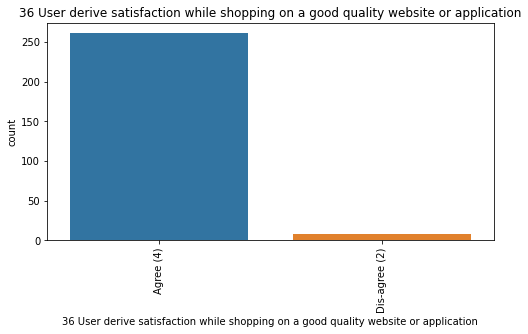

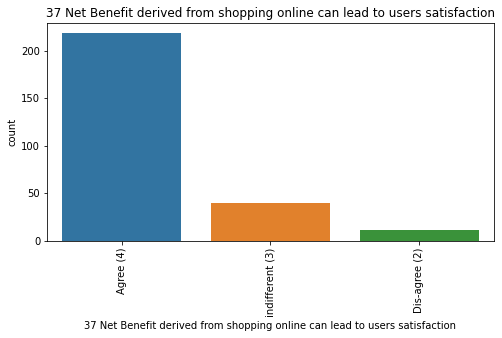

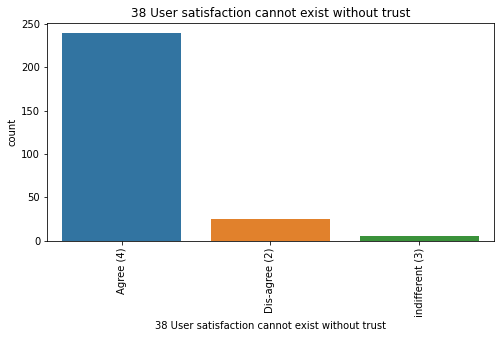

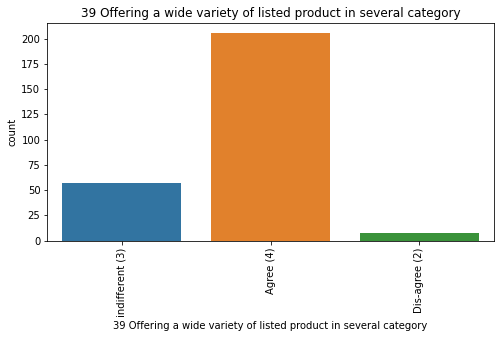

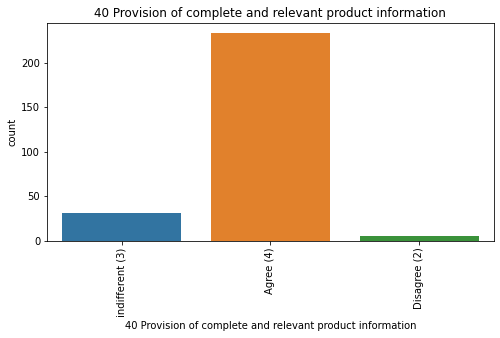

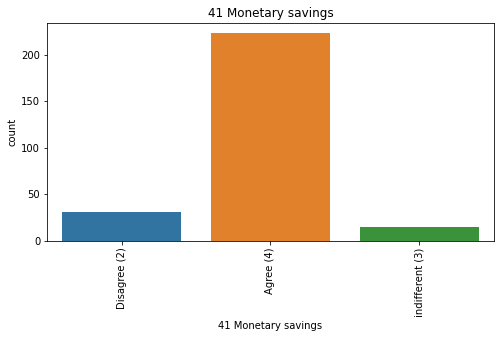

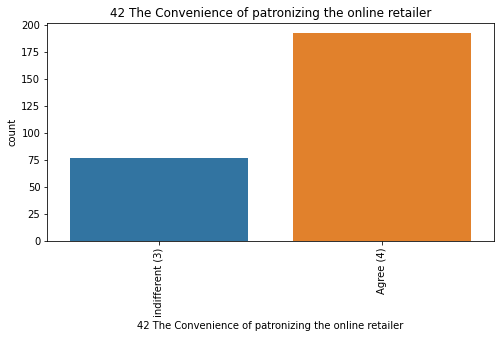

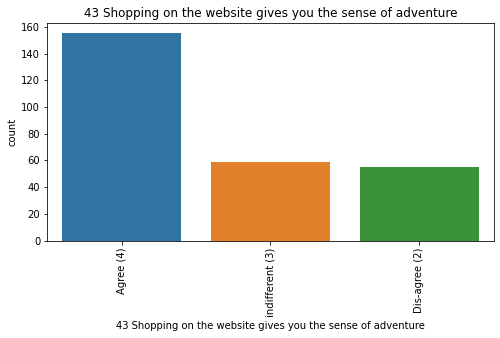

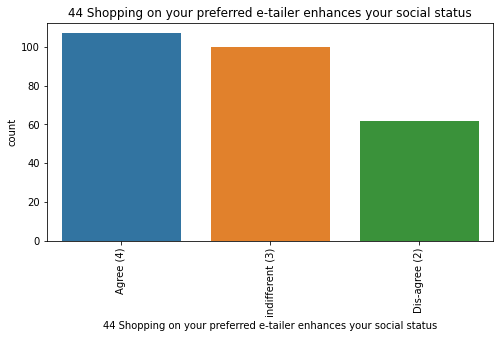

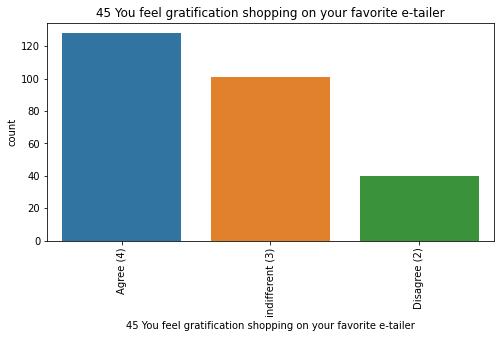

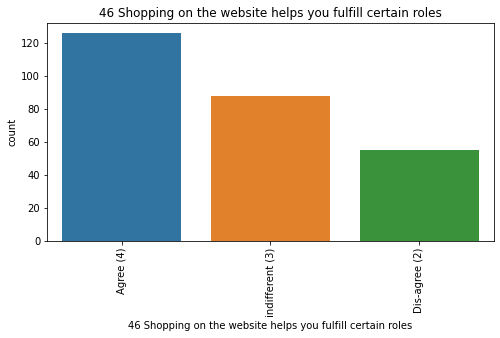

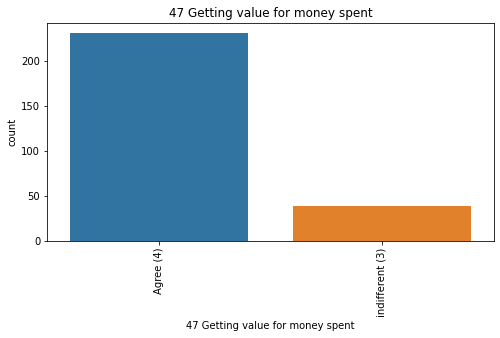

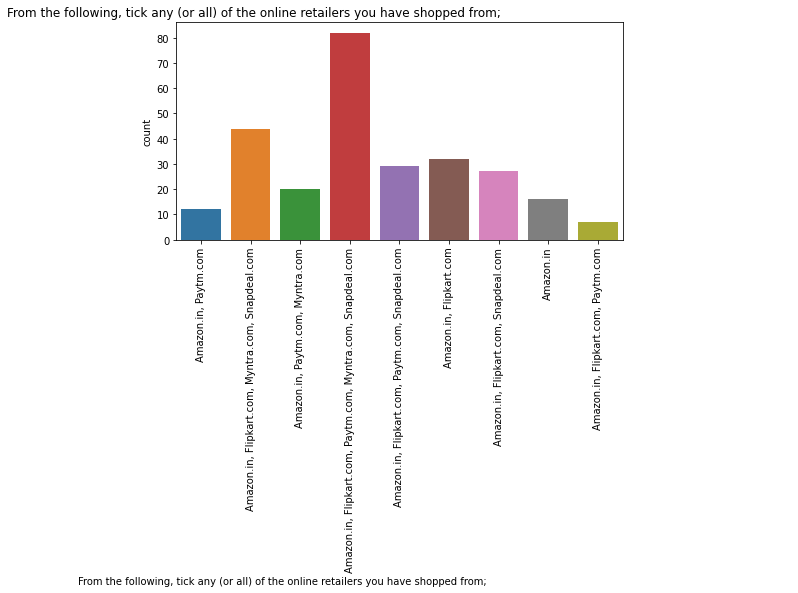

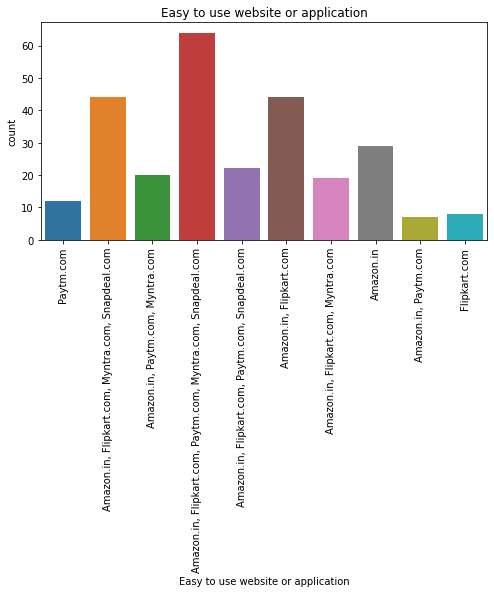

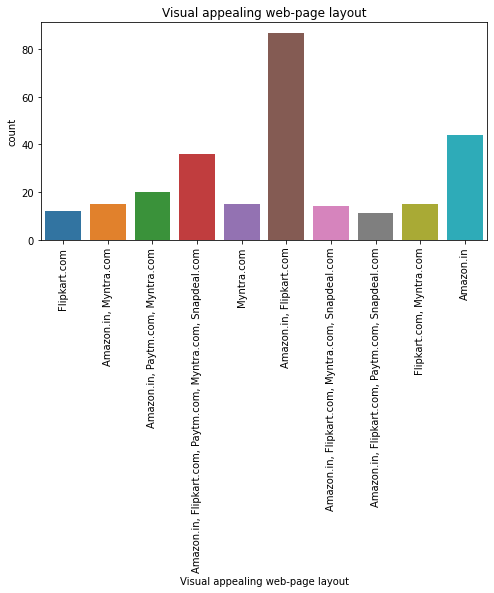

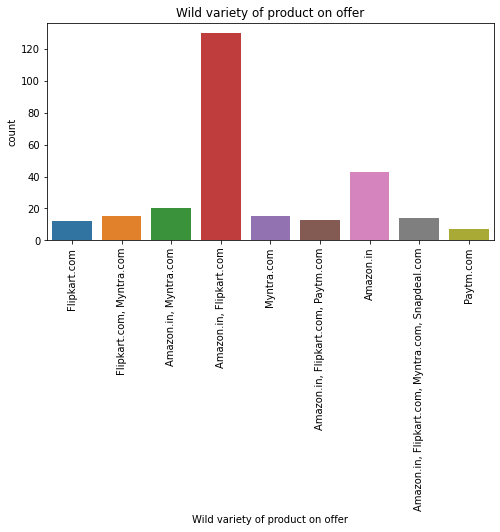

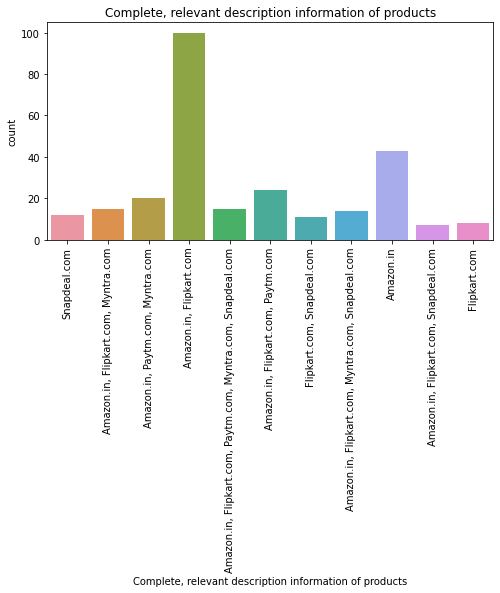

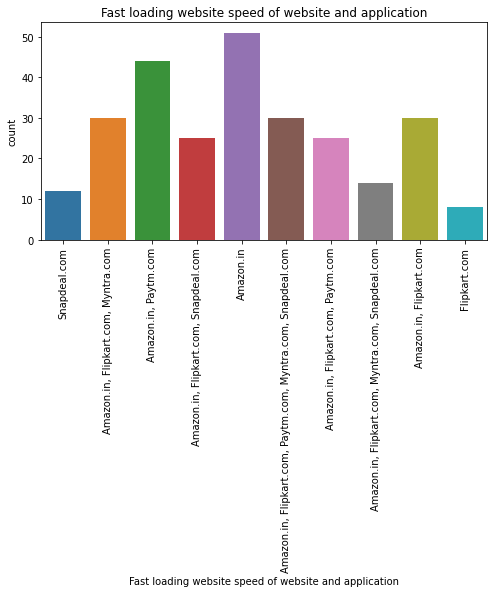

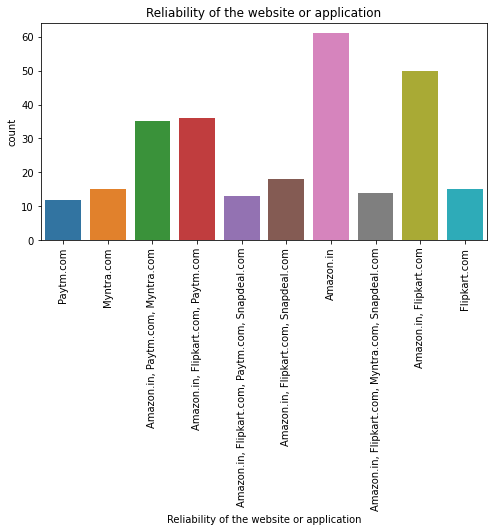

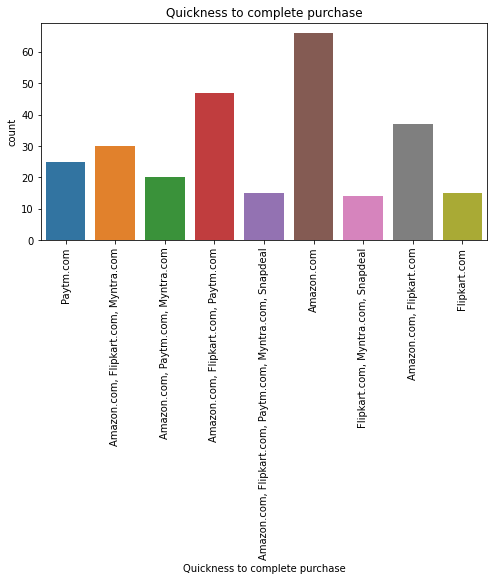

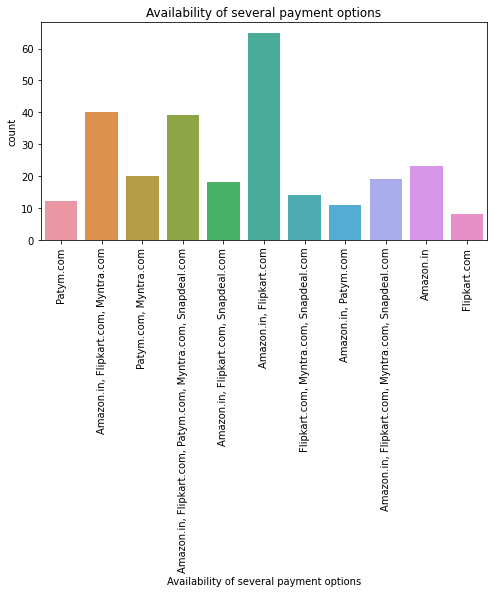

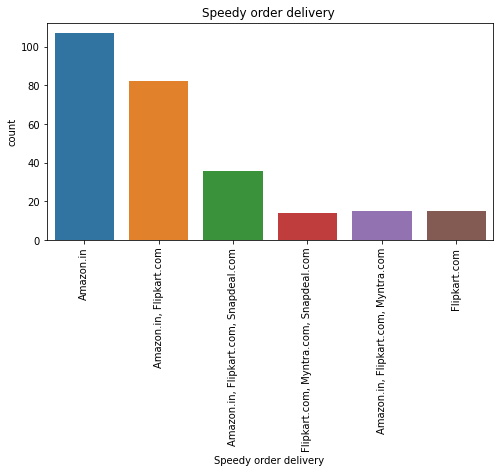

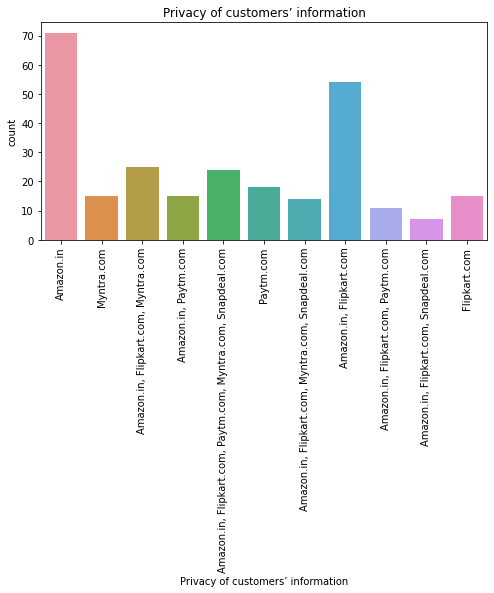

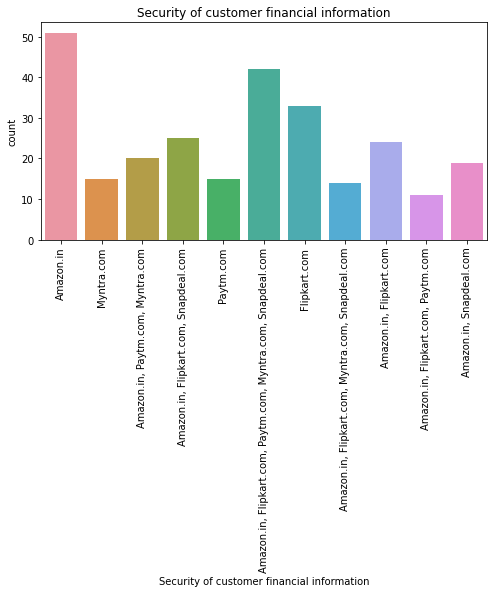

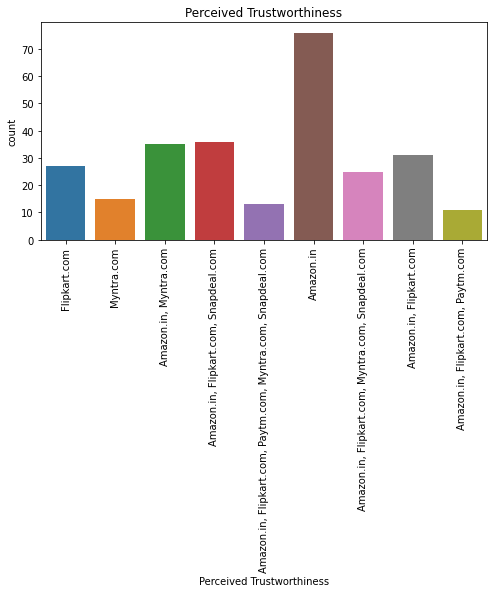

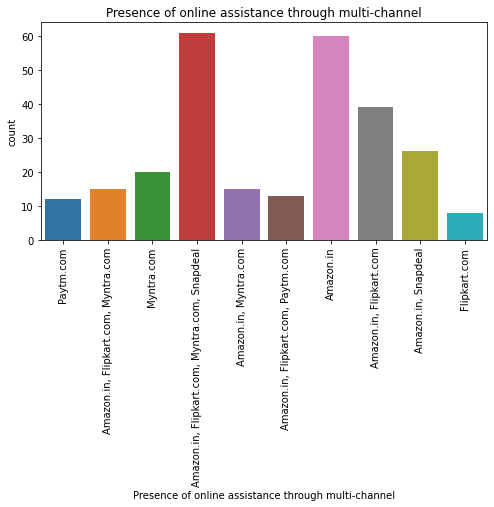

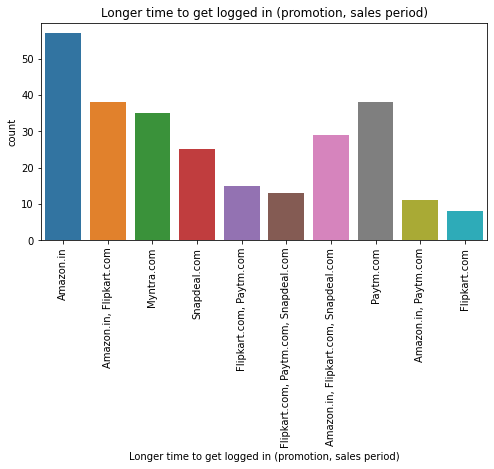

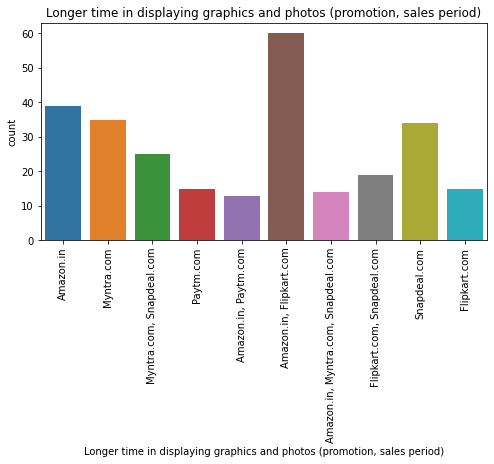

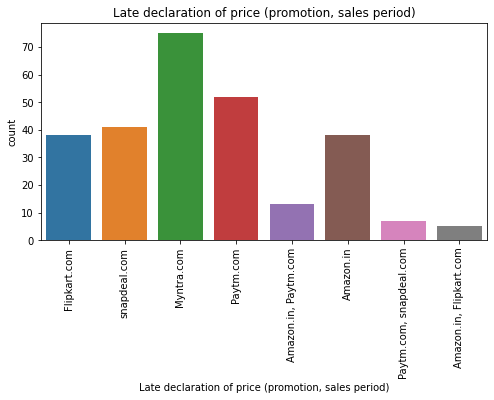

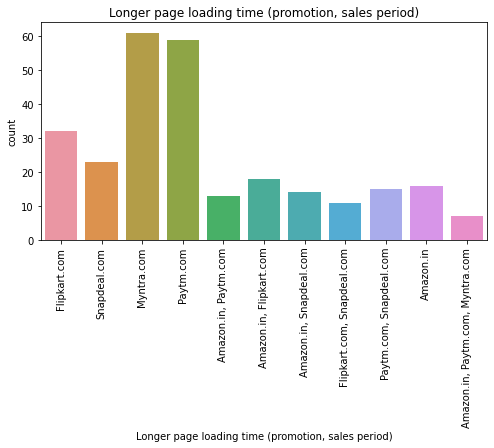

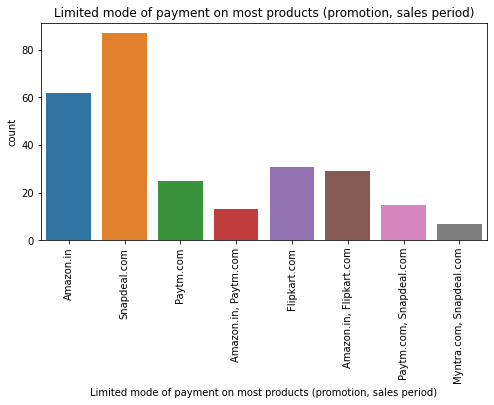

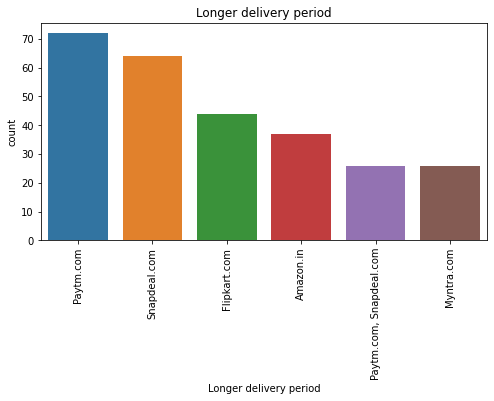

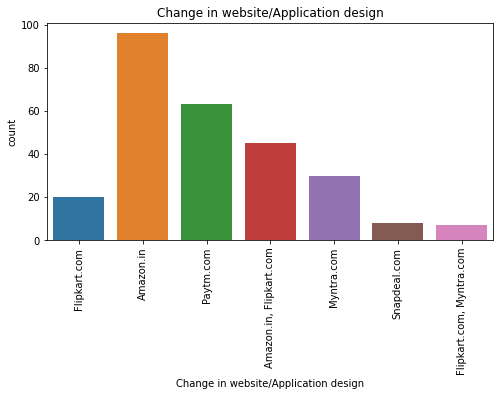

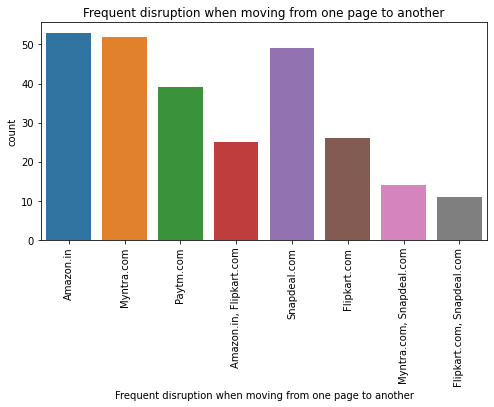

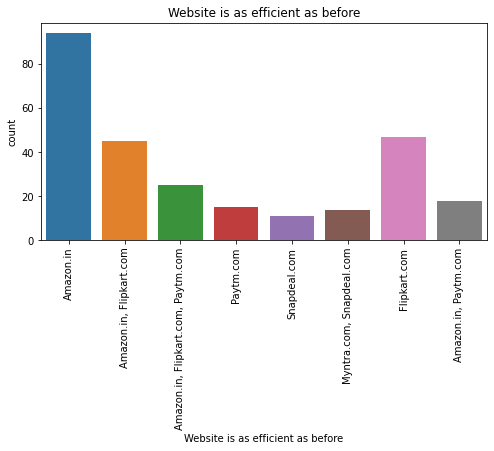

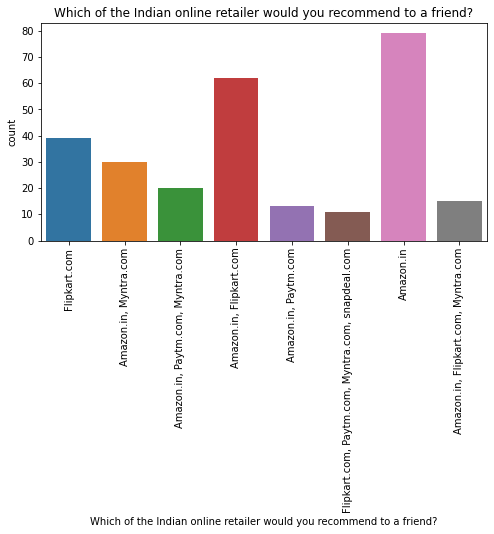

In [54]:
#Count plot for all categorical columns
for i in df[categorical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.countplot(df[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

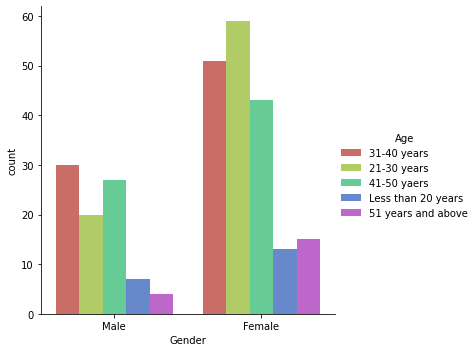

In [58]:
#Factor plot for Gender
sns.factorplot('Gender',kind='count',data=df,hue='Age',palette="hls")
plt.xticks(rotation=0);

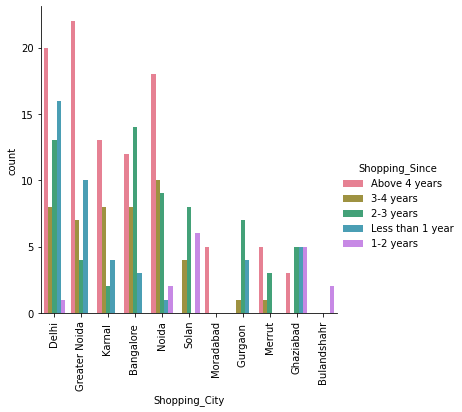

In [59]:
#Factor plot for Shopping_City
sns.factorplot('Shopping_City',kind='count',data=df,hue='Shopping_Since',palette="husl")
plt.xticks(rotation=90);

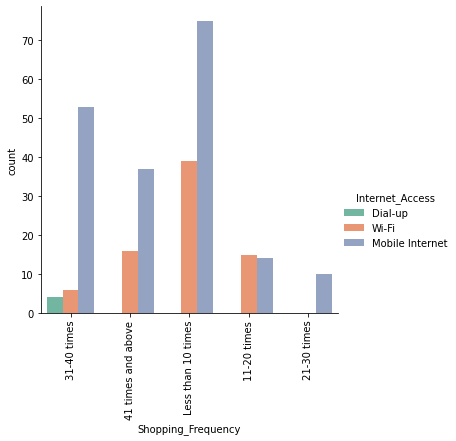

In [61]:
#Factor plot for Shopping_Frequency
sns.factorplot('Shopping_Frequency',kind='count',data=df,hue='Internet_Access',palette="Set2")
plt.xticks(rotation=90);

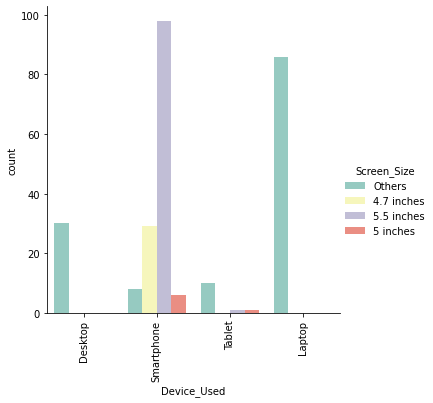

In [62]:
#Factor plot for Device_Used
sns.factorplot('Device_Used',kind='count',data=df,hue='Screen_Size',palette="Set3")
plt.xticks(rotation=90);

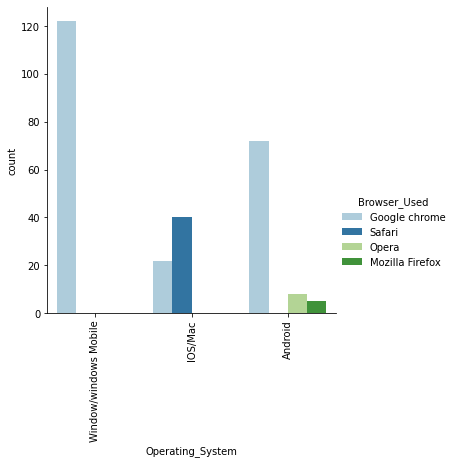

In [63]:
#Factor plot for Operating_System          
sns.factorplot('Operating_System',kind='count',data=df,hue='Browser_Used',palette="Paired")
plt.xticks(rotation=90);

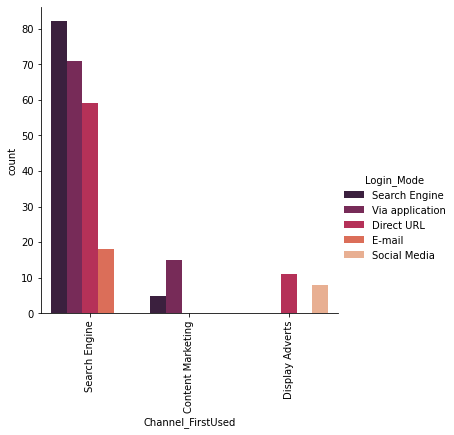

In [64]:
#Factor plot for Channel_FirstUsed                                             
sns.factorplot('Channel_FirstUsed',kind='count',data=df,hue='Login_Mode',palette="rocket")
plt.xticks(rotation=90);

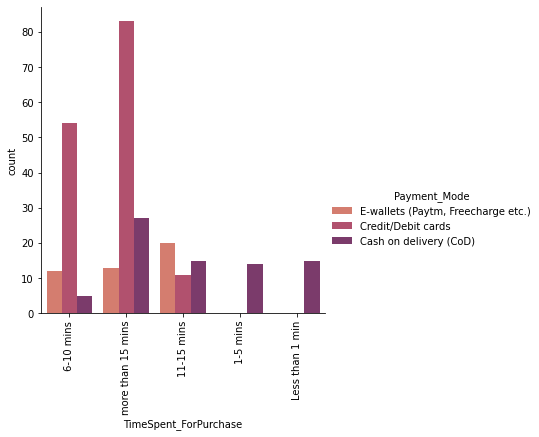

In [65]:
#Factor plot for TimeSpent_ForPurchase             
sns.factorplot('TimeSpent_ForPurchase',kind='count',data=df,hue='Payment_Mode',palette="flare")
plt.xticks(rotation=90);

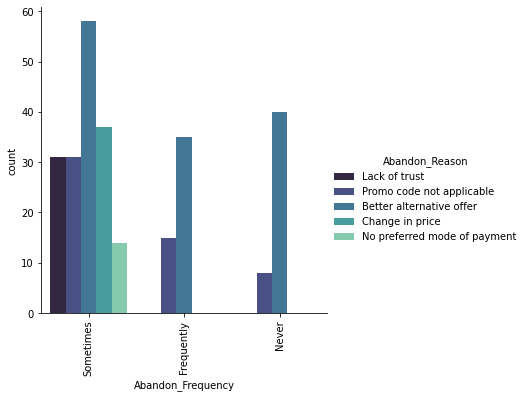

In [66]:

#Factor plot for Abandon_Frequency                                                  
sns.factorplot('Abandon_Frequency',kind='count',data=df,hue='Abandon_Reason',palette="mako")
plt.xticks(rotation=90);

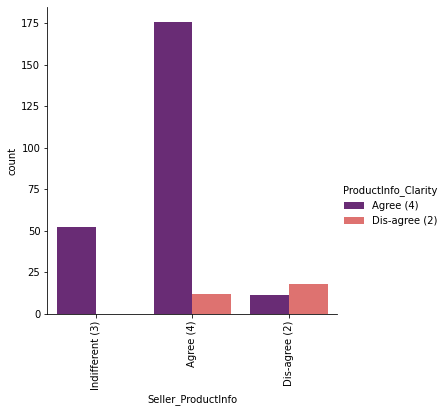

In [67]:
#Factor plot for Seller_ProductInfo
sns.factorplot('Seller_ProductInfo',kind='count',data=df,hue='ProductInfo_Clarity',palette="magma")
plt.xticks(rotation=90);

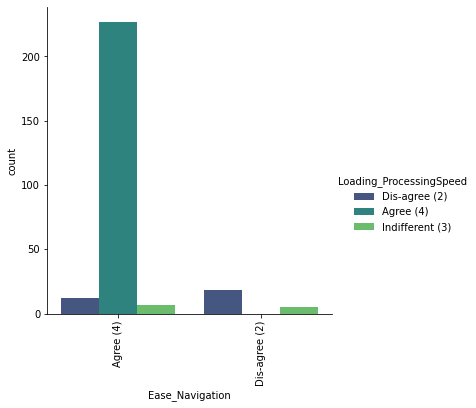

In [68]:
#Factor plot for Ease_Navigation
sns.factorplot('Ease_Navigation',kind='count',data=df,hue='Loading_ProcessingSpeed',palette="viridis")
plt.xticks(rotation=90);

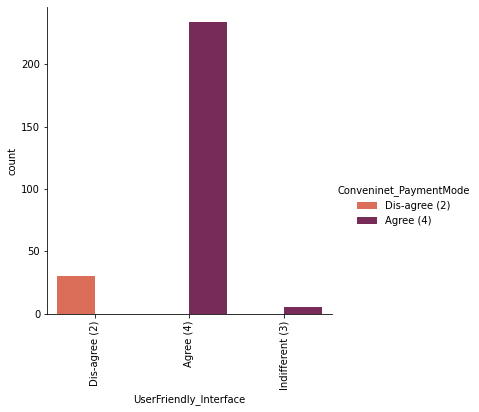

In [69]:
#Factor plot for UserFriendly_Interface
sns.factorplot('UserFriendly_Interface',kind='count',data=df,hue='Conveninet_PaymentMode',palette="rocket_r")
plt.xticks(rotation=90);

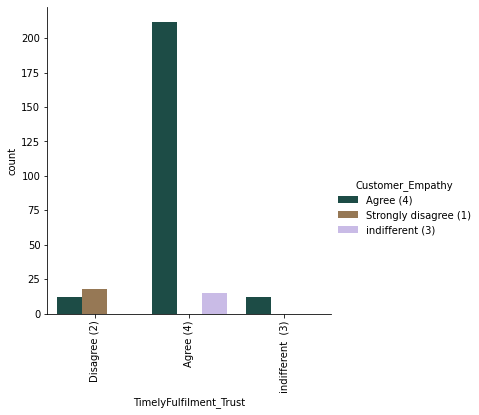

In [70]:
#Factor plot for TimelyFulfilment_Trust
sns.factorplot('TimelyFulfilment_Trust',kind='count',data=df,hue='Customer_Empathy',palette="cubehelix")
plt.xticks(rotation=90);

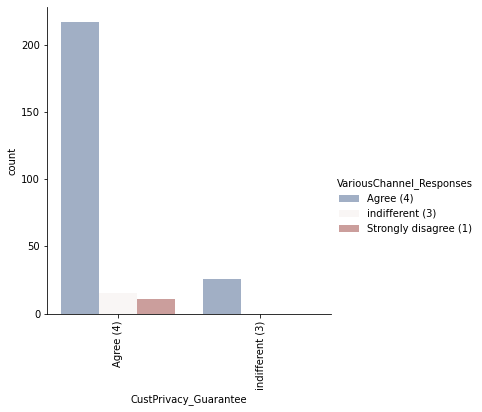

In [71]:

#Factor plot for CustPrivacy_Guarantee
sns.factorplot('CustPrivacy_Guarantee',kind='count',data=df,hue='VariousChannel_Responses',palette="vlag")
plt.xticks(rotation=90);

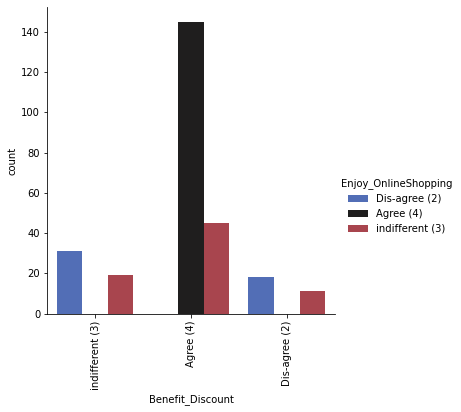

In [72]:

#Factor plot for Benefit_Discount
sns.factorplot('Benefit_Discount',kind='count',data=df,hue='Enjoy_OnlineShopping',palette="icefire")
plt.xticks(rotation=90);

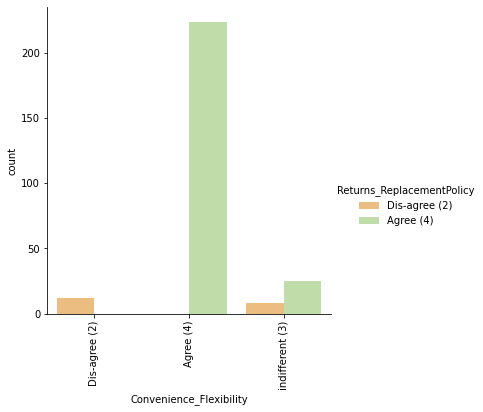

In [73]:
#Factor plot for Convenience_Flexibility
sns.factorplot('Convenience_Flexibility',kind='count',data=df,hue='Returns_ReplacementPolicy',palette="Spectral")
plt.xticks(rotation=90);

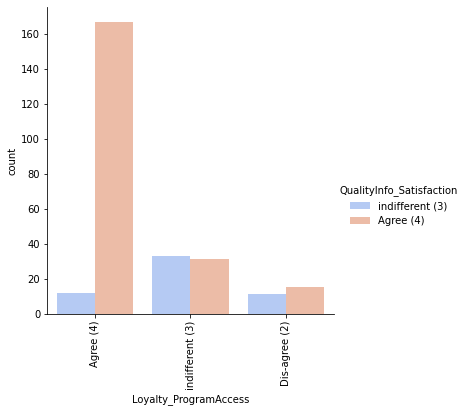

In [74]:
#Factor plot for Loyalty_ProgramAccess
sns.factorplot('Loyalty_ProgramAccess',kind='count',data=df,hue='QualityInfo_Satisfaction',palette="coolwarm")
plt.xticks(rotation=90);

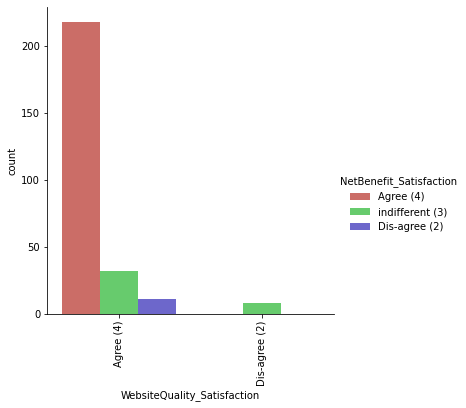

In [75]:
#Factor plot for WebsiteQuality_Satisfaction
sns.factorplot('WebsiteQuality_Satisfaction',kind='count',data=df,hue='NetBenefit_Satisfaction',palette="hls")
plt.xticks(rotation=90);

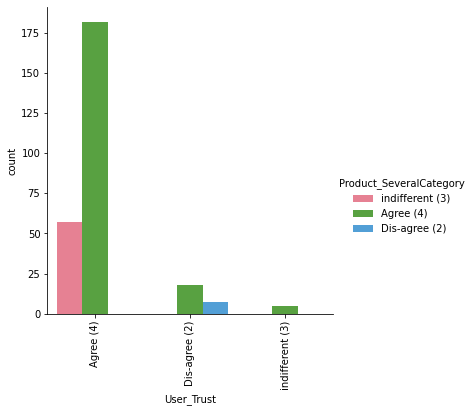

In [76]:
#Factor plot for User_Trust
sns.factorplot('User_Trust',kind='count',data=df,hue='Product_SeveralCategory',palette="husl")
plt.xticks(rotation=90);

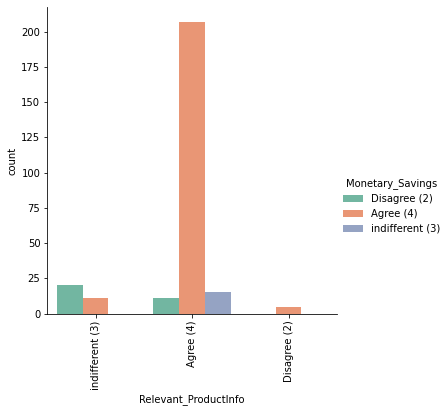

In [77]:

#Factor plot for Relevant_ProductInfo
sns.factorplot('Relevant_ProductInfo',kind='count',data=df,hue='Monetary_Savings',palette="Set2")
plt.xticks(rotation=90);

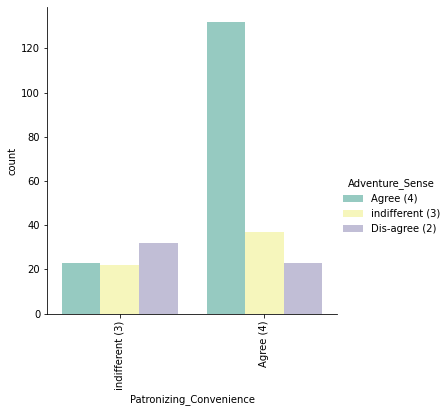

In [78]:
#Factor plot for Patronizing_Convenience
sns.factorplot('Patronizing_Convenience',kind='count',data=df,hue='Adventure_Sense',palette="Set3")
plt.xticks(rotation=90);

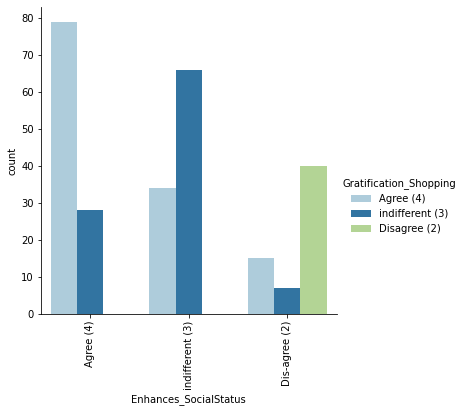

In [79]:
#Factor plot for Enhances_SocialStatus
sns.factorplot('Enhances_SocialStatus',kind='count',data=df,hue='Gratification_Shopping',palette="Paired")
plt.xticks(rotation=90);

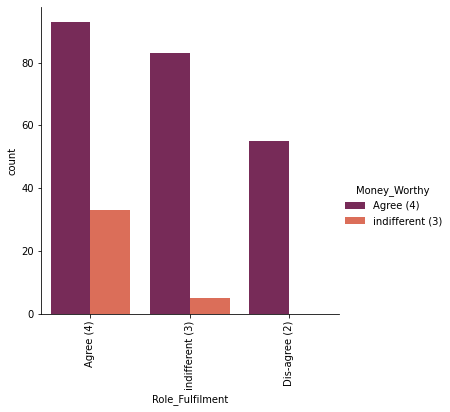

In [80]:
#Factor plot for Role_Fulfilment
sns.factorplot('Role_Fulfilment',kind='count',data=df,hue='Money_Worthy',palette="rocket")
plt.xticks(rotation=90);

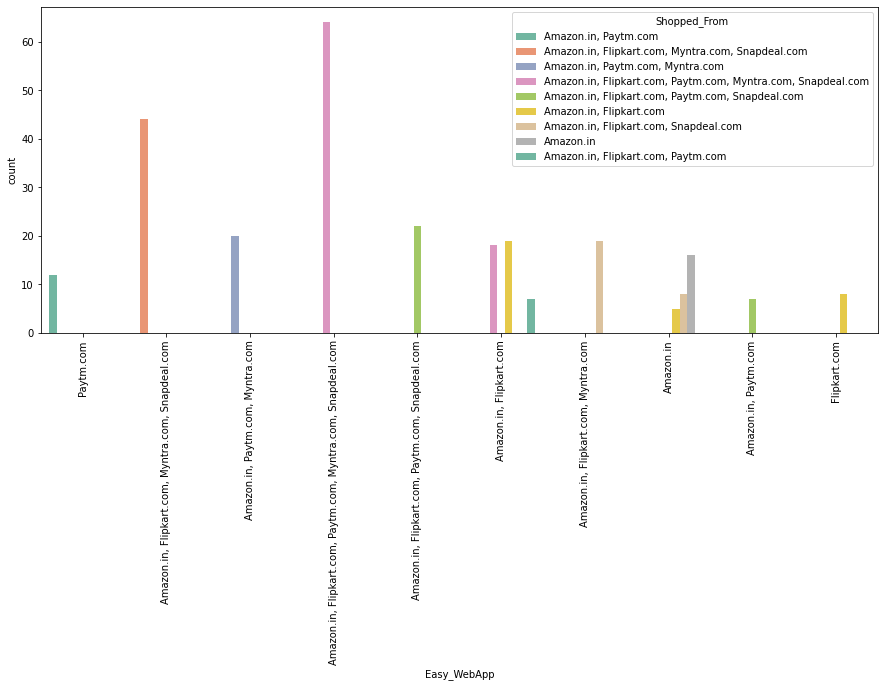

In [81]:
#Count plot for Easy_WebApp
plt.figure(figsize=[15,6])
sns.countplot('Easy_WebApp',data=df,hue='Shopped_From',palette="Set2")
plt.xticks(rotation=90);

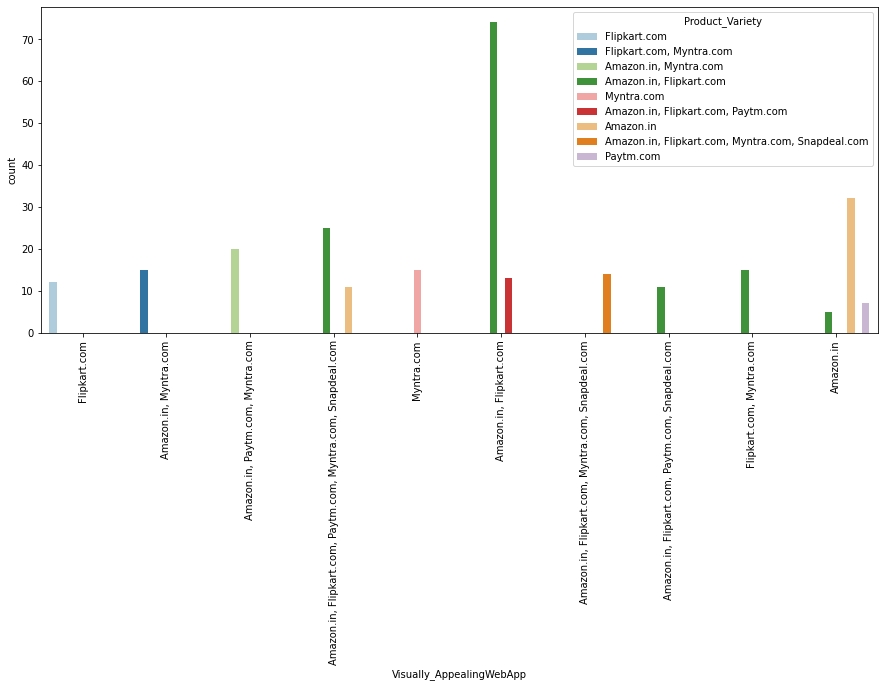

In [82]:
#Count plot for Visually_AppealingWebApp
plt.figure(figsize=[15,6])
sns.countplot('Visually_AppealingWebApp',data=df,hue='Product_Variety',palette="Paired")
plt.xticks(rotation=90);

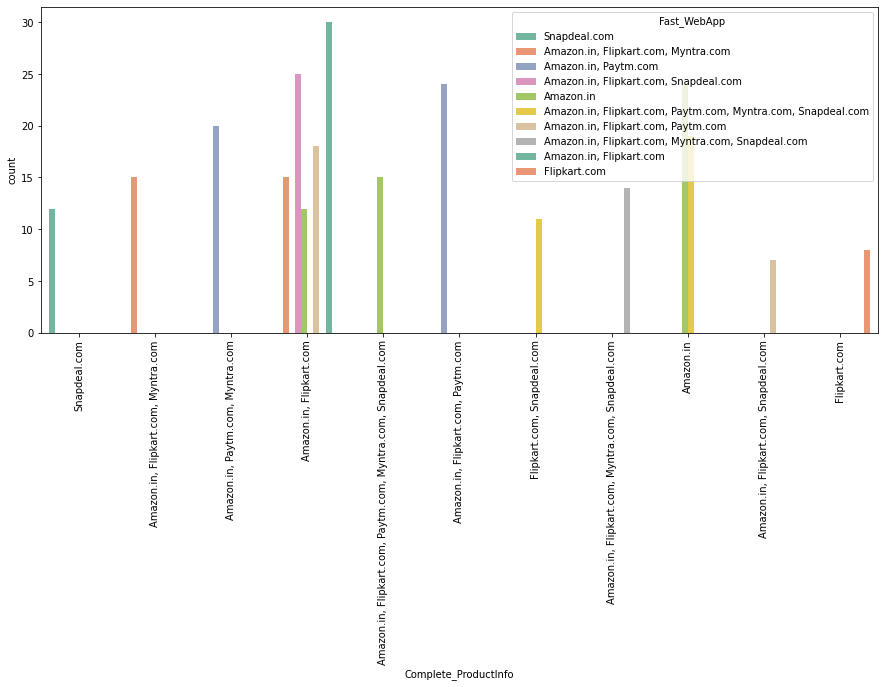

In [83]:
#Count plot for Complete_ProductInfo
plt.figure(figsize=[15,6])
sns.countplot('Complete_ProductInfo',data=df,hue='Fast_WebApp',palette="Set2")
plt.xticks(rotation=90);

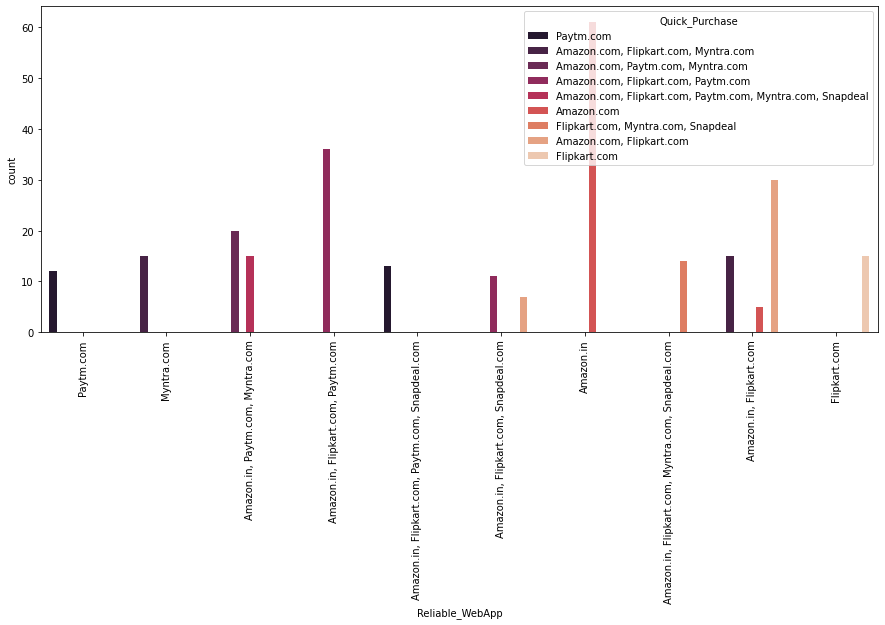

In [86]:
#Count plot for Reliable_WebApp
plt.figure(figsize=[15,6])
sns.countplot('Reliable_WebApp',data=df,hue='Quick_Purchase',palette="rocket")
plt.xticks(rotation=90);

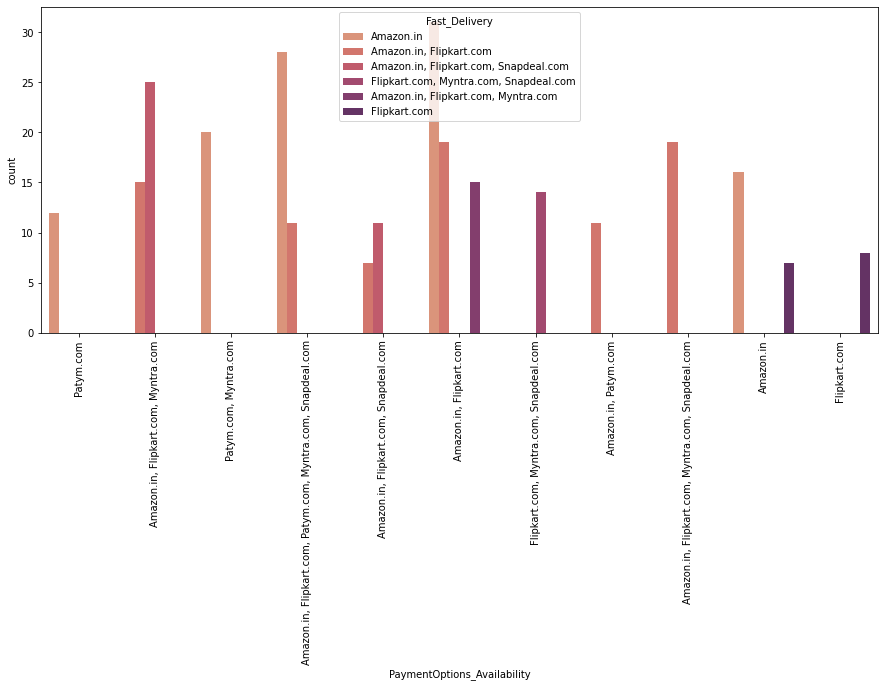

In [85]:
#Count plot for PaymentOptions_Availability
plt.figure(figsize=[15,6])
sns.countplot('PaymentOptions_Availability',data=df,hue='Fast_Delivery',palette="flare")
plt.xticks(rotation=90);

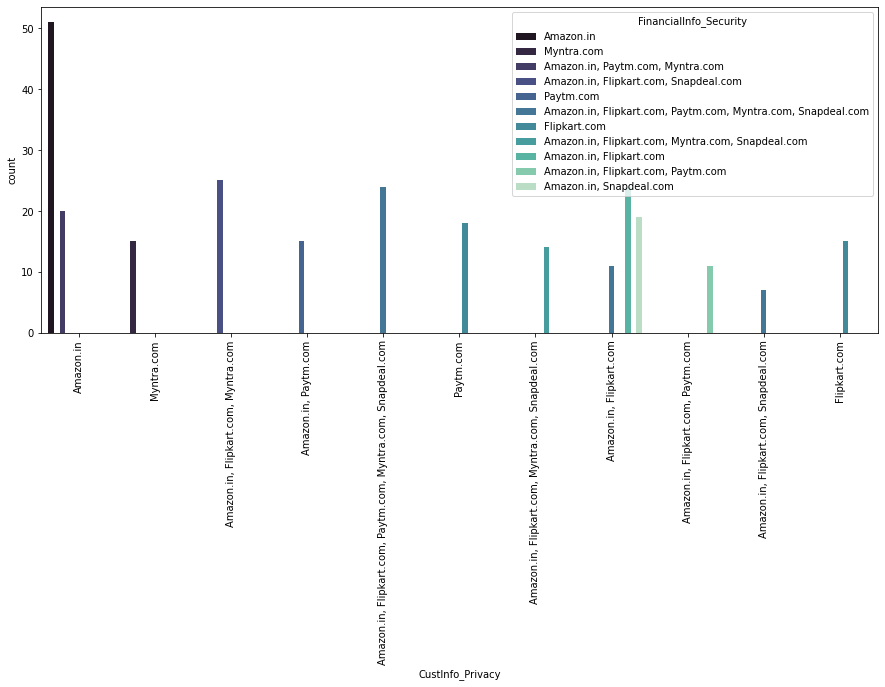

In [87]:
#Count plot for CustInfo_Privacy
plt.figure(figsize=[15,6])
sns.countplot('CustInfo_Privacy',data=df,hue='FinancialInfo_Security',palette="mako")
plt.xticks(rotation=90);

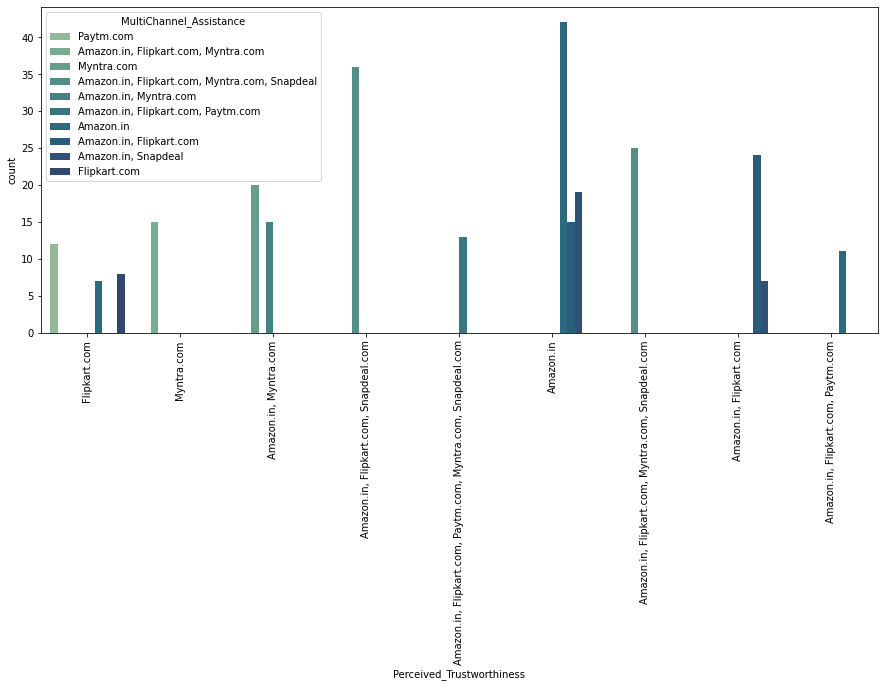

In [88]:
#Count plot for Perceived_Trustworthiness
plt.figure(figsize=[15,6])
sns.countplot('Perceived_Trustworthiness',data=df,hue='MultiChannel_Assistance',palette="crest")
plt.xticks(rotation=90);

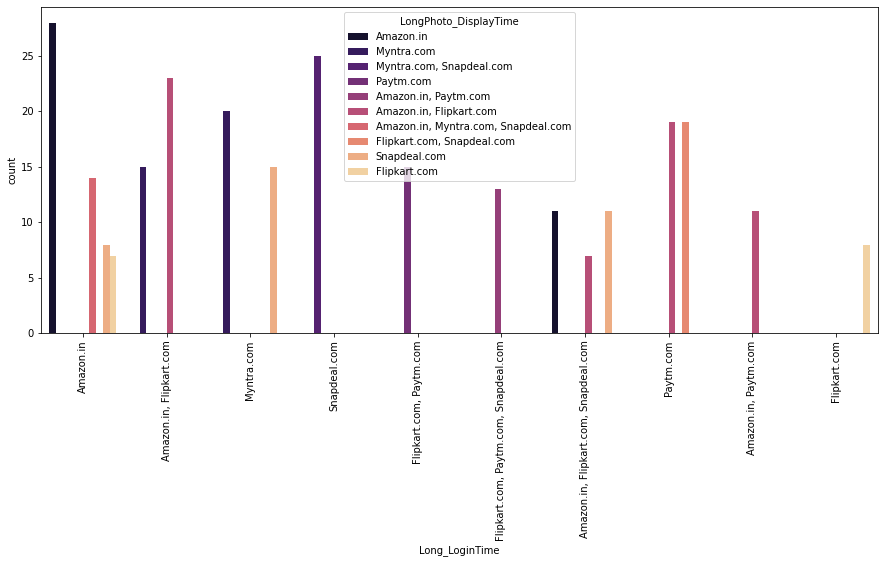

In [90]:
#Count plot for Long_LoginTime
plt.figure(figsize=[15,6])
sns.countplot('Long_LoginTime',data=df,hue='LongPhoto_DisplayTime',palette="magma")
plt.xticks(rotation=90);

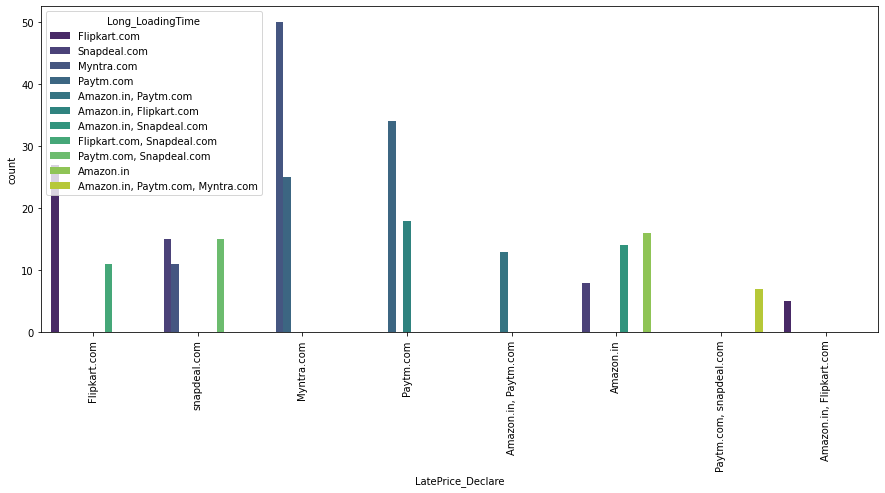

In [91]:
#Count plot for LatePrice_Declare
plt.figure(figsize=[15,6])
sns.countplot('LatePrice_Declare',data=df,hue='Long_LoadingTime',palette="viridis")
plt.xticks(rotation=90);

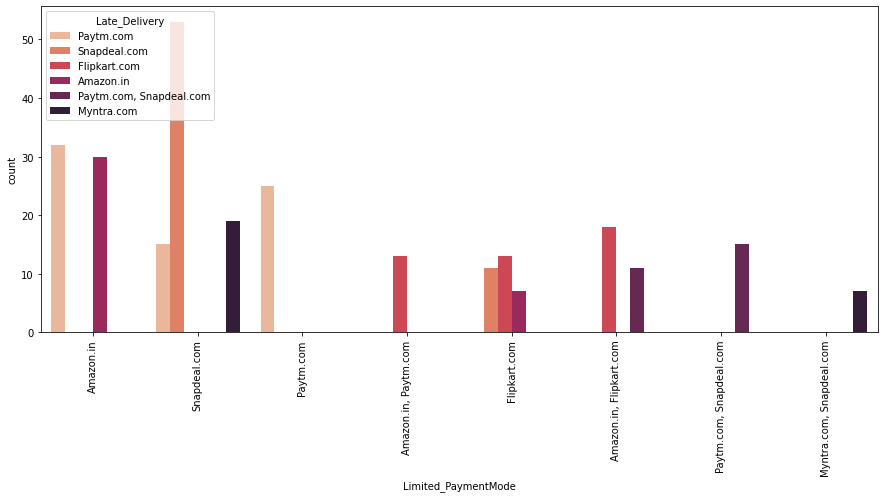

In [92]:
#Count plot for Limited_PaymentMode
plt.figure(figsize=[15,6])
sns.countplot('Limited_PaymentMode',data=df,hue='Late_Delivery',palette="rocket_r")
plt.xticks(rotation=90);

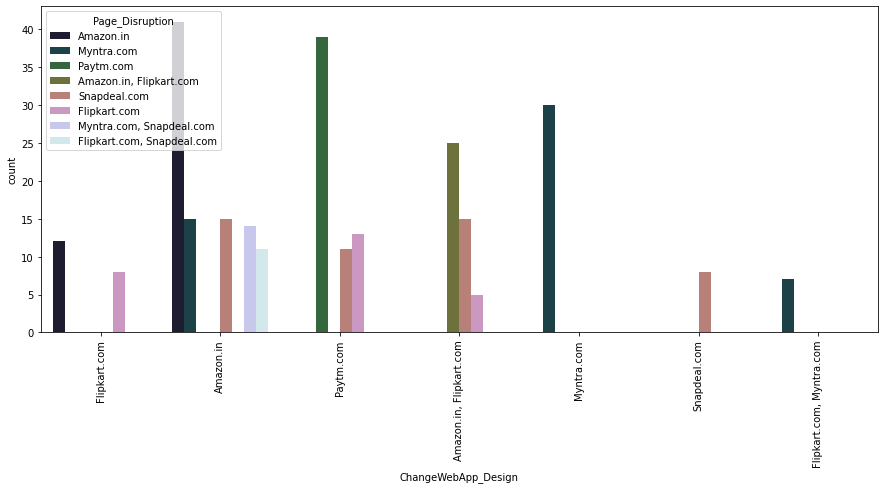

In [93]:
#Count plot for ChangeWebApp_Design
plt.figure(figsize=[15,6])
sns.countplot('ChangeWebApp_Design',data=df,hue='Page_Disruption',palette="cubehelix")
plt.xticks(rotation=90);

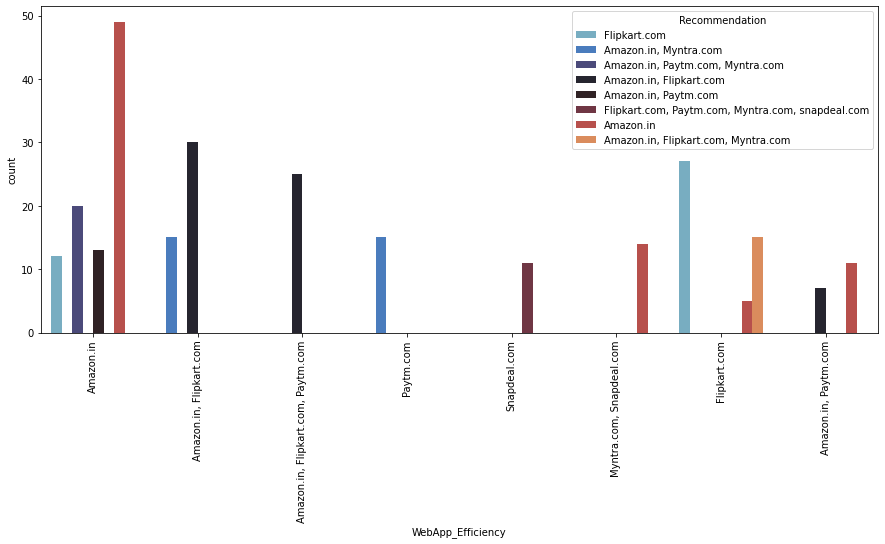

In [95]:
#Count plot for WebApp_Efficiency
plt.figure(figsize=[15,6])
sns.countplot('WebApp_Efficiency',data=df,hue='Recommendation',palette="icefire")
plt.xticks(rotation=90);


Most of the customers are females with age from 20-50 and they used mobile internet to access with Windows as operating sysytem.
And most of the customers used search engines to get into the platform first time and frequently.
Max customers uses there debit/credit cards for there payment.
Almost customers agrees to have Content_Readability, Similar_ProductInfo, Seller_ProductInfo, ProductInfo_Clarity, Ease_Navigation, Loading_ProcessingSpeed, UserFriendly_Interface, Conveninet_PaymentMode, TimelyFulfilment_Trust, Customer_Empathy, CustPrivacy_Guarantee, VariousChannel_Responses, Benefit_Discount, Enjoy_OnlineShopping, Convenience_Flexibility, Returns_ReplacementPolicy, Loyalty_ProgramAccess, QualityInfo_Satisfaction, WebsiteQuality_Satisfaction, NetBenefit_Satisfaction, User_Trust, Product_SeveralCategory, Relevant_ProductInfo, Monetary_Savings, Patronizing_Convenience, Adventure_Sense, Enhances_SocialStatus, Gratification_Shopping, Role_Fulfilment, Money_Worthy.
Compared to other platforms shopping with Amazon.in and Flipkart.com has maximum benefits rather than drawbacks.

# Label Encoding:

In [99]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[categorical_columns]= df[categorical_columns].apply(LE.fit_transform)

In [100]:
df[categorical_columns].head()

,Gender,Age,Shopping_City,PinCode,Shopping_Since,Shopping_Frequency,Internet_Access,Device_Used,Screen_Size,Operating_System,Browser_Used,Channel_FirstUsed,Login_Mode,TimeSpent_ForPurchase,Payment_Mode,Abandon_Frequency,Abandon_Reason,Content_Readability,Similar_ProductInfo,Seller_ProductInfo,ProductInfo_Clarity,Ease_Navigation,Loading_ProcessingSpeed,UserFriendly_Interface,Conveninet_PaymentMode,TimelyFulfilment_Trust,Customer_Empathy,CustPrivacy_Guarantee,VariousChannel_Responses,Benefit_Discount,Enjoy_OnlineShopping,Convenience_Flexibility,Returns_ReplacementPolicy,Loyalty_ProgramAccess,QualityInfo_Satisfaction,WebsiteQuality_Satisfaction,NetBenefit_Satisfaction,User_Trust,Product_SeveralCategory,Relevant_ProductInfo,Monetary_Savings,Patronizing_Convenience,Adventure_Sense,Enhances_SocialStatus,Gratification_Shopping,Role_Fulfilment,Money_Worthy,Shopped_From,Easy_WebApp,Visually_AppealingWebApp,Product_Variety,Complete_ProductInfo,Fast_WebApp,Reliable_WebApp,Quick_Purchase,PaymentOptions_Availability,Fast_Delivery,CustInfo_Privacy,FinancialInfo_Security,Perceived_Trustworthiness,MultiChannel_Assistance,Long_LoginTime,LongPhoto_DisplayTime,LatePrice_Declare,Long_LoadingTime,Limited_PaymentMode,Late_Delivery,ChangeWebApp_Design,Page_Disruption,WebApp_Efficiency,Recommendation
0,1,1,2,1,3,2,0,0,3,2,0,2,2,2,2,2,2,0,2,2,0,0,1,1,1,1,0,0,0,2,1,1,1,0,1,0,0,0,2,2,1,1,0,0,0,0,0,7,9,7,5,10,9,9,8,9,0,0,0,7,9,0,0,3,5,0,3,2,0,0,6
1,0,0,2,5,3,3,2,2,0,1,0,2,4,4,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,0,0,2,3,5,6,2,2,8,2,2,1,9,9,8,2,1,6,7,10,7,5,0,4,1,3
2,0,0,4,23,2,3,1,2,2,0,0,2,4,1,2,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,8,7,6,4,7,7,6,5,10,0,0,6,6,8,7,6,4,7,0,3,5,6,0,5
3,1,0,6,11,2,4,1,2,2,1,3,2,2,2,1,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,2,0,2,1,0,2,0,0,0,0,0,0,0,0,2,0,4,4,3,1,1,6,3,3,2,3,2,5,5,3,9,7,4,8,5,3,1,1,2,1
4,0,0,0,31,1,0,2,2,0,1,3,0,4,4,1,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1,0,1,0,4,4,9,7,5,0,6,4,4,0,7,10,6,5,5,8,5,8,7,3,0,7,6,3



In this perticular dataset no need to check for outliers and skewness since all the columns are categorical. And as i'm just doing data analysis no need to check correlation also. Correlation in necessary while building the model.v

In [101]:
#Printing final dataset
df.head()

,Gender,Age,Shopping_City,PinCode,Shopping_Since,Shopping_Frequency,Internet_Access,Device_Used,Screen_Size,Operating_System,Browser_Used,Channel_FirstUsed,Login_Mode,TimeSpent_ForPurchase,Payment_Mode,Abandon_Frequency,Abandon_Reason,Content_Readability,Similar_ProductInfo,Seller_ProductInfo,ProductInfo_Clarity,Ease_Navigation,Loading_ProcessingSpeed,UserFriendly_Interface,Conveninet_PaymentMode,TimelyFulfilment_Trust,Customer_Empathy,CustPrivacy_Guarantee,VariousChannel_Responses,Benefit_Discount,Enjoy_OnlineShopping,Convenience_Flexibility,Returns_ReplacementPolicy,Loyalty_ProgramAccess,QualityInfo_Satisfaction,WebsiteQuality_Satisfaction,NetBenefit_Satisfaction,User_Trust,Product_SeveralCategory,Relevant_ProductInfo,Monetary_Savings,Patronizing_Convenience,Adventure_Sense,Enhances_SocialStatus,Gratification_Shopping,Role_Fulfilment,Money_Worthy,Shopped_From,Easy_WebApp,Visually_AppealingWebApp,Product_Variety,Complete_ProductInfo,Fast_WebApp,Reliable_WebApp,Quick_Purchase,PaymentOptions_Availability,Fast_Delivery,CustInfo_Privacy,FinancialInfo_Security,Perceived_Trustworthiness,MultiChannel_Assistance,Long_LoginTime,LongPhoto_DisplayTime,LatePrice_Declare,Long_LoadingTime,Limited_PaymentMode,Late_Delivery,ChangeWebApp_Design,Page_Disruption,WebApp_Efficiency,Recommendation
0,1,1,2,1,3,2,0,0,3,2,0,2,2,2,2,2,2,0,2,2,0,0,1,1,1,1,0,0,0,2,1,1,1,0,1,0,0,0,2,2,1,1,0,0,0,0,0,7,9,7,5,10,9,9,8,9,0,0,0,7,9,0,0,3,5,0,3,2,0,0,6
1,0,0,2,5,3,3,2,2,0,1,0,2,4,4,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,0,0,2,3,5,6,2,2,8,2,2,1,9,9,8,2,1,6,7,10,7,5,0,4,1,3
2,0,0,4,23,2,3,1,2,2,0,0,2,4,1,2,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,8,7,6,4,7,7,6,5,10,0,0,6,6,8,7,6,4,7,0,3,5,6,0,5
3,1,0,6,11,2,4,1,2,2,1,3,2,2,2,1,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,2,0,2,1,0,2,0,0,0,0,0,0,0,0,2,0,4,4,3,1,1,6,3,3,2,3,2,5,5,3,9,7,4,8,5,3,1,1,2,1
4,0,0,0,31,1,0,2,2,0,1,3,0,4,4,1,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1,0,1,0,4,4,9,7,5,0,6,4,4,0,7,10,6,5,5,8,5,8,7,3,0,7,6,3


# Conclusion:

## Conclusion:
There is high risk of customer churn with:
Myntra.com
Snapdeal.com
Paytm.com

## High customer retension and satisfaction with:


Amazon.in
Flipkart.com

When customers are satisfied with a company or service, there is a high possibility that they will share their experience with other people Therefore it is crucial for E-commerce to take into account their customer satisfaction because this will retain customer loyalty as well as attract potential customers.

To conclude, having the right customer retention strategy will keep sellers company growing if they know how to take advantage of it. Then customers will find their way back and continue buying stuff from the best company.